In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ahu = pd.read_csv("/content/drive/MyDrive/ime_project/data/porest_area_ahu_automatic.csv")
chiller = pd.read_csv("/content/drive/MyDrive/ime_project/data/porest_area_chiller_automatic.csv")

column_e = ['no', 'id', 'seq', 'type', 'val', 'rv', 'ri', 'sv', 'si', 'tv', 'ti', 'fire', 'temperature', 'humidity', 'cdate']
e = pd.read_csv('/content/drive/MyDrive/ime_project/data/porest_device_e_log.csv', names=column_e)

column_plant = ["no", "id", "seq", "air", "monoxide", "dioxide", "pm2d5", "pm10", "temperature", "humidit", "score", "cdate"]
plant = pd.read_csv('/content/drive/MyDrive/ime_project/data/porest_device_plant_log.csv', names=column_plant)

# 장치 정보
devices = pd.read_excel("/content/drive/MyDrive/ime_project/data/porest_devices.xlsx",header=1)

<ipython-input-80-3fdb6dc9d919>:8: DtypeWarning: Columns (3,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  plant = pd.read_csv('/content/drive/MyDrive/ime_project/data/porest_device_plant_log.csv', names=column_plant)


In [ ]:
ahu['cdate'] = pd.to_datetime(ahu['cdate'])
ahu.replace("\\N", np.nan, inplace=True)

chiller['cdate'] = pd.to_datetime(chiller['cdate'])
chiller.replace("\\N", np.nan, inplace=True)

e['cdate'] = pd.to_datetime(e['cdate'])
e.replace("\\N", np.nan, inplace=True)

plant['cdate'] = pd.to_datetime(plant['cdate'])
plant.replace("\\N", np.nan, inplace=True)

<ipython-input-79-967bef549e28>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e['cdate'] = pd.to_datetime(e['cdate'])
<ipython-input-79-967bef549e28>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e.replace("\\N", np.nan, inplace=True)


# ahu

In [ ]:
ahu_a = ahu[ahu['building'] == 'A']
ahu_a.head()

,no,ahu_no,building,power,inv,occupancy,out_temp,in_temp,zone_min_temp,cdate
0,1,1,A,1,30,8,24.0,NaN,NaN,2023-01-31 10:09:00
1,2,2,A,0,0,8,24.0,NaN,NaN,2023-01-31 10:09:00
2,3,3,A,1,30,8,24.0,NaN,NaN,2023-01-31 10:09:00
3,4,4,A,0,0,5,24.0,NaN,NaN,2023-01-31 10:09:00
4,5,5,A,1,30,5,24.0,NaN,NaN,2023-01-31 10:09:00


In [ ]:
ahu_group = ahu_a.groupby('ahu_no')

ahu_dict0 = {}
for name, group_df in ahu_group:
  ahu_dict0[name] = group_df

In [ ]:
ahu_dict0[1]

,no,ahu_no,building,power,inv,occupancy,out_temp,in_temp,zone_min_temp,cdate
0,1,1,A,1,30,8,24.000,NaN,NaN,2023-01-31 10:09:00
20,21,1,A,1,30,8,24.000,NaN,NaN,2023-01-31 10:10:00
40,41,1,A,1,30,8,25.000,NaN,NaN,2023-01-31 10:20:00
59,60,1,A,1,30,8,25.000,NaN,NaN,2023-01-31 10:30:00
78,79,1,A,1,30,8,25.000,NaN,NaN,2023-01-31 10:40:00
...,...,...,...,...,...,...,...,...,...,...
28313,28314,1,A,1,40,6,31.385,26.54,25.25,2023-08-01 15:20:00
28321,28322,1,A,1,40,6,31.405,26.63,25.25,2023-08-01 15:30:00
28329,28330,1,A,1,40,7,31.315,26.56,25.1,2023-08-01 15:40:00
28337,28338,1,A,1,40,7,31.320,26.58,25.1,2023-08-01 15:50:00


In [ ]:
start_date = '2023-01-31 10:00:00'
end_date = '2023-08-01 16:00:00'

date_range = pd.date_range(start=start_date, end=end_date, freq='10T')

ahu_dict = {}
for name, group_df in ahu_group:
  group_df = group_df.set_index('cdate')
  group_df = group_df.loc[~group_df.index.duplicated(keep='first')]
  group_df = group_df.reindex(date_range)
  ahu_dict[name] = group_df

In [ ]:
ahu_dict[1].head()

,no,ahu_no,building,power,inv,occupancy,out_temp,in_temp,zone_min_temp
2023-01-31 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-31 10:10:00,21.0,1.0,A,1.0,30.0,8.0,24.0,NaN,NaN
2023-01-31 10:20:00,41.0,1.0,A,1.0,30.0,8.0,25.0,NaN,NaN
2023-01-31 10:30:00,60.0,1.0,A,1.0,30.0,8.0,25.0,NaN,NaN
2023-01-31 10:40:00,79.0,1.0,A,1.0,30.0,8.0,25.0,NaN,NaN


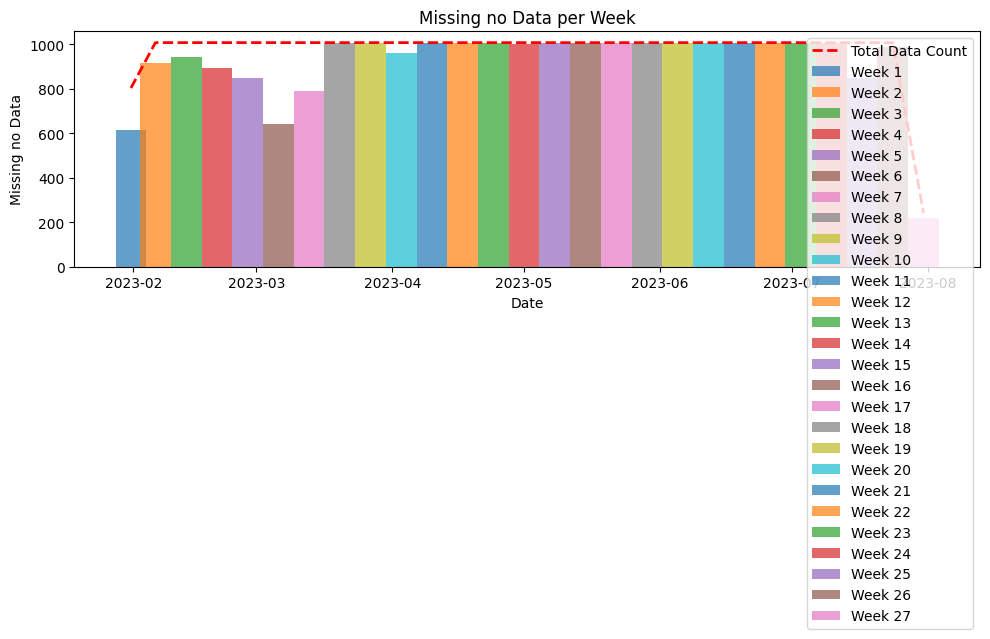

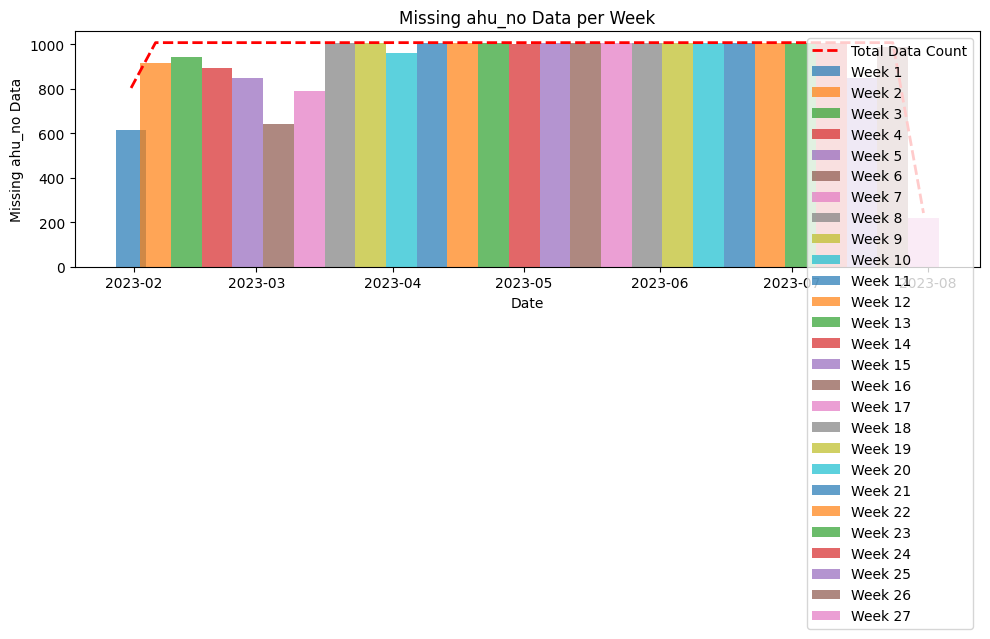

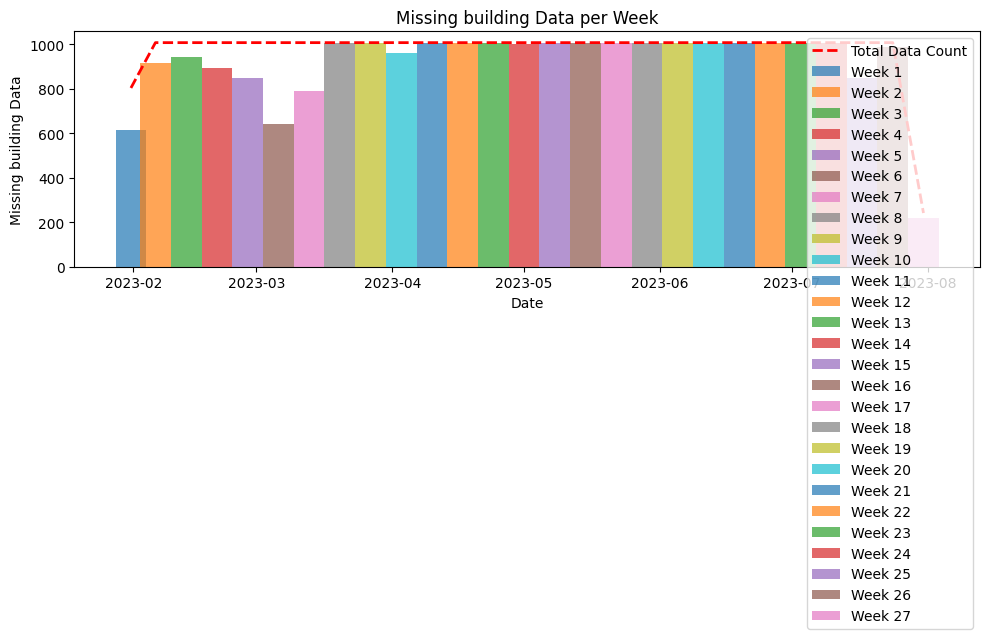

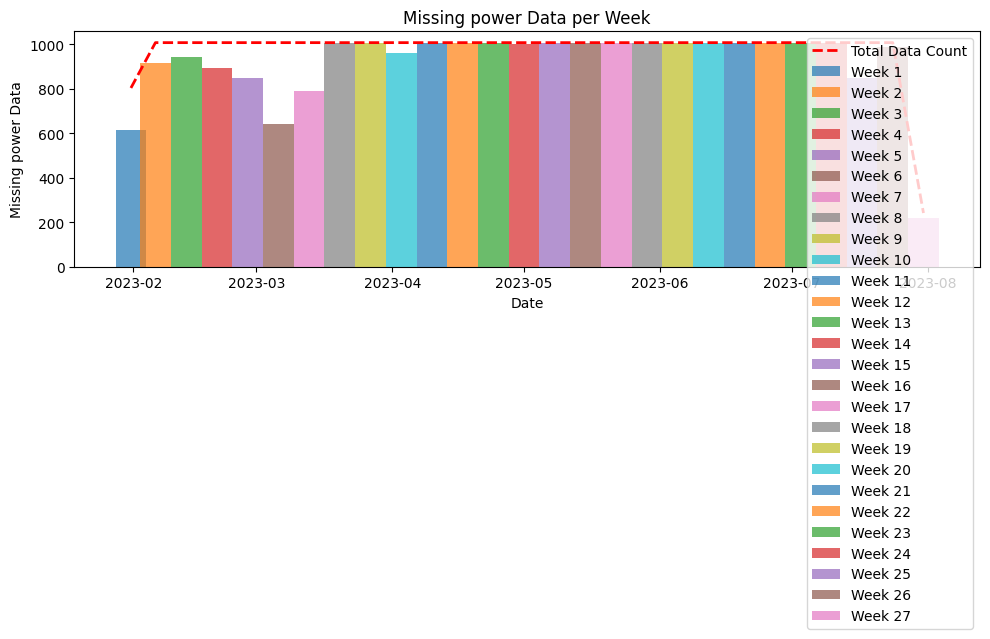

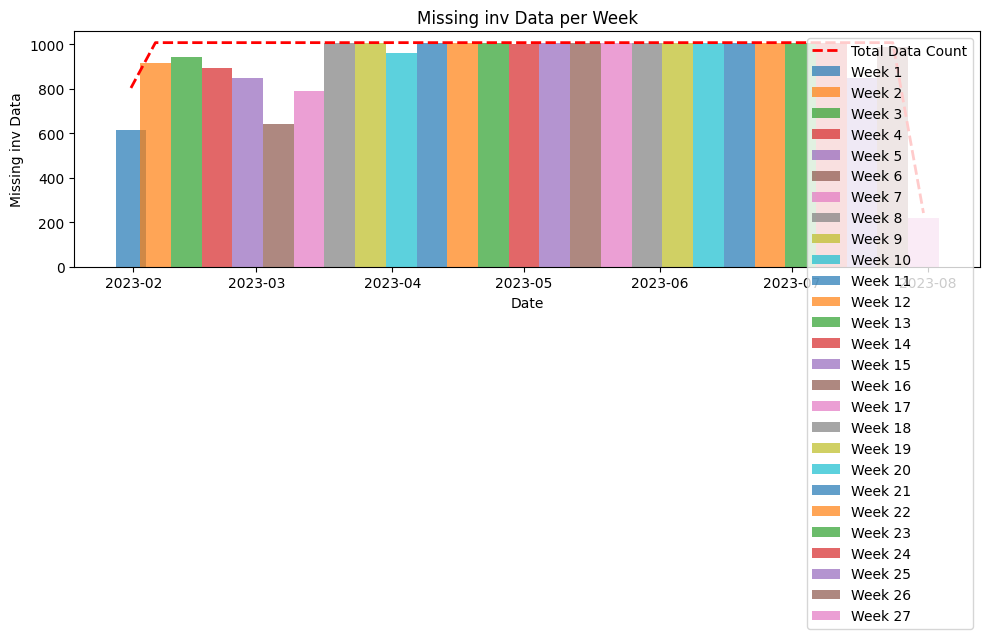

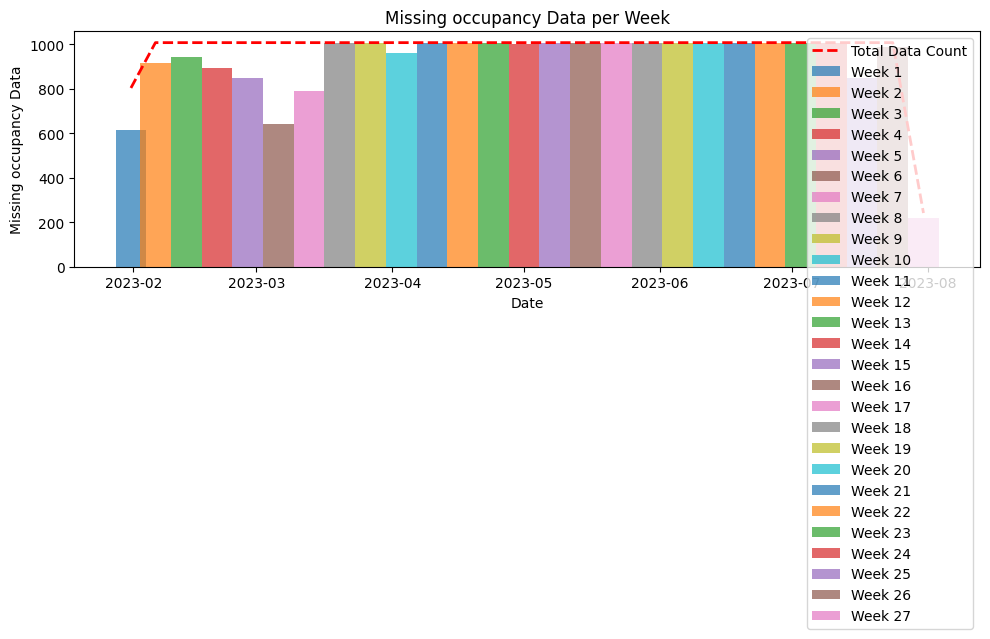

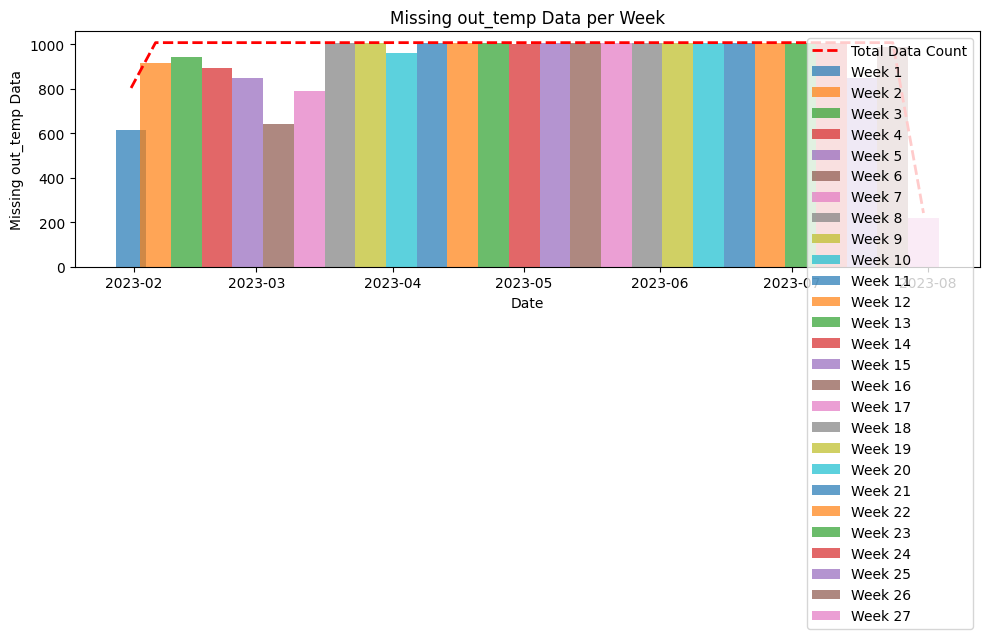

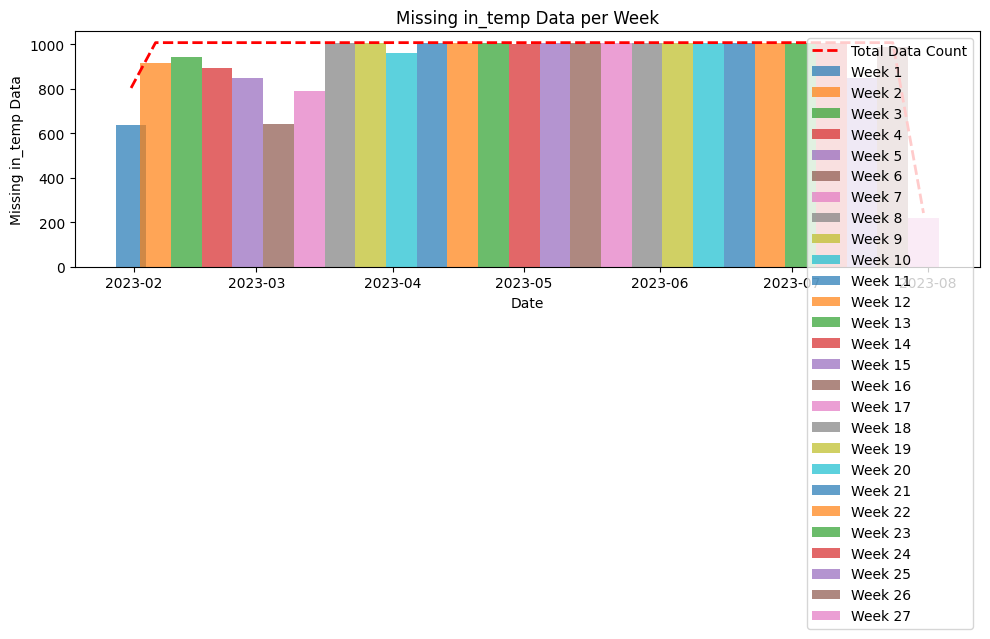

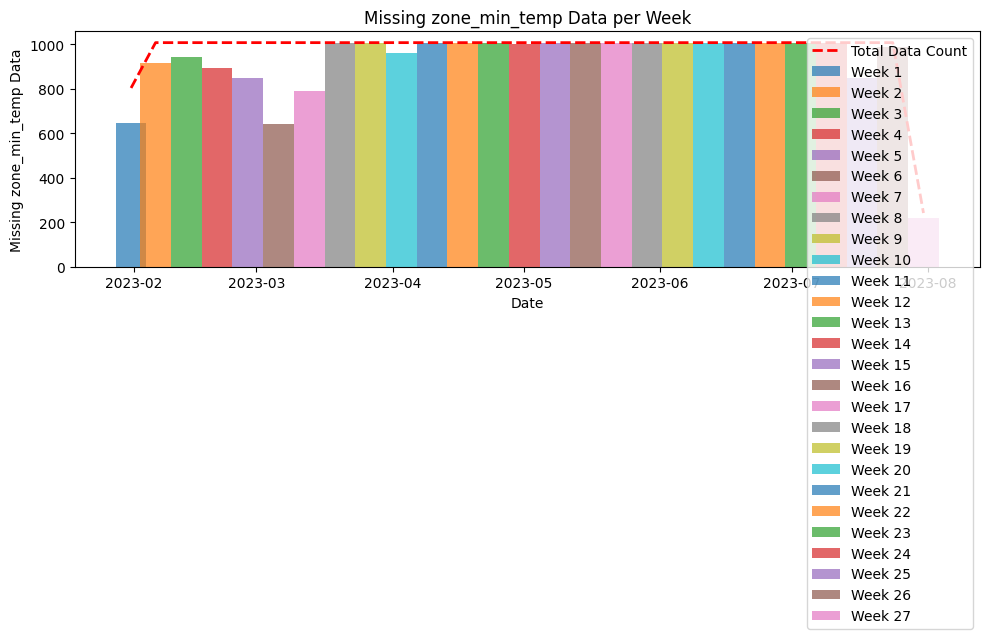

In [ ]:
ahu1 = ahu_dict[1]

import matplotlib.pyplot as plt

# 주차별로 데이터 분리
weeks = ahu1.groupby(pd.Grouper(level=0, freq='W'))

features = ahu1.columns

for feature in features:
    plt.figure(figsize=(10, 5))

    total_data_counts = []  # 각 주차별로 누적된 전체 데이터 개수를 저장하기 위한 리스트
    week_start_dates = []  # 각 주차의 시작 날짜를 저장하기 위한 리스트

    for week_number, week_data in enumerate(weeks):
        week_start_date = week_data[1].index.min()
        week_end_date = week_data[1].index.max()

        # 결측치 계산
        missing_data = week_data[1][feature].isnull().sum()

        # 주차별로 결측치를 막대 그래프로 시각화
        plt.bar(week_start_date, missing_data, width=7, label=f'Week {week_number + 1}', alpha=0.7)

        # 전체 데이터 개수 계산 및 저장
        total_data_count = len(week_data[1])
        total_data_counts.append(total_data_count)
        week_start_dates.append(week_start_date)

    # 빨간색 선 그래프로 전체 데이터 개수를 나타냅니다.
    plt.plot(week_start_dates, total_data_counts, color='red', label='Total Data Count', linewidth=2, linestyle='--')

    plt.xlabel('Date')
    plt.ylabel(f'Missing {feature} Data')
    plt.title(f'Missing {feature} Data per Week')
    plt.legend()
    plt.tight_layout()
    plt.show()

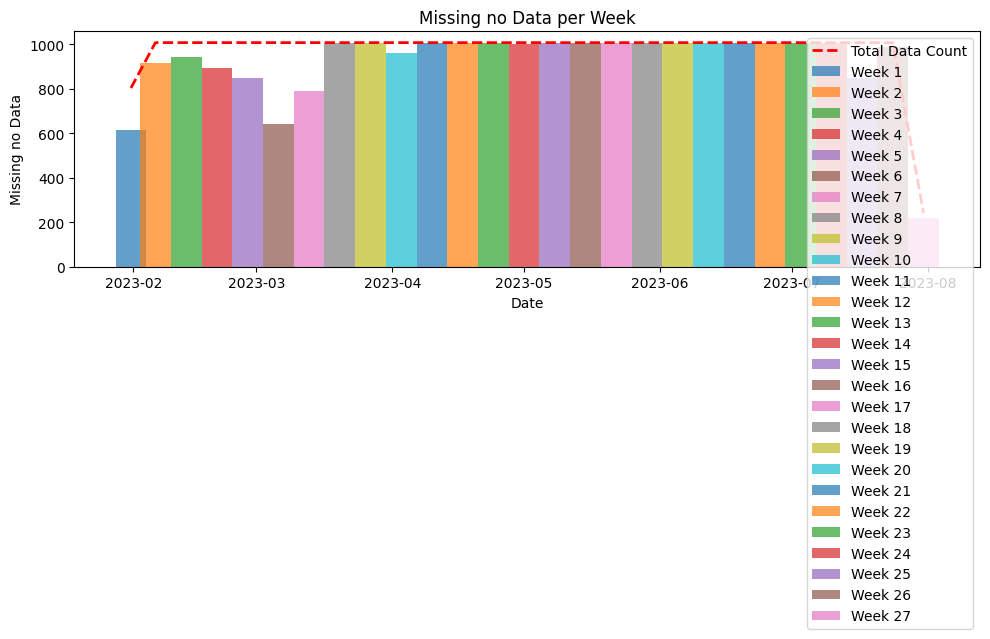

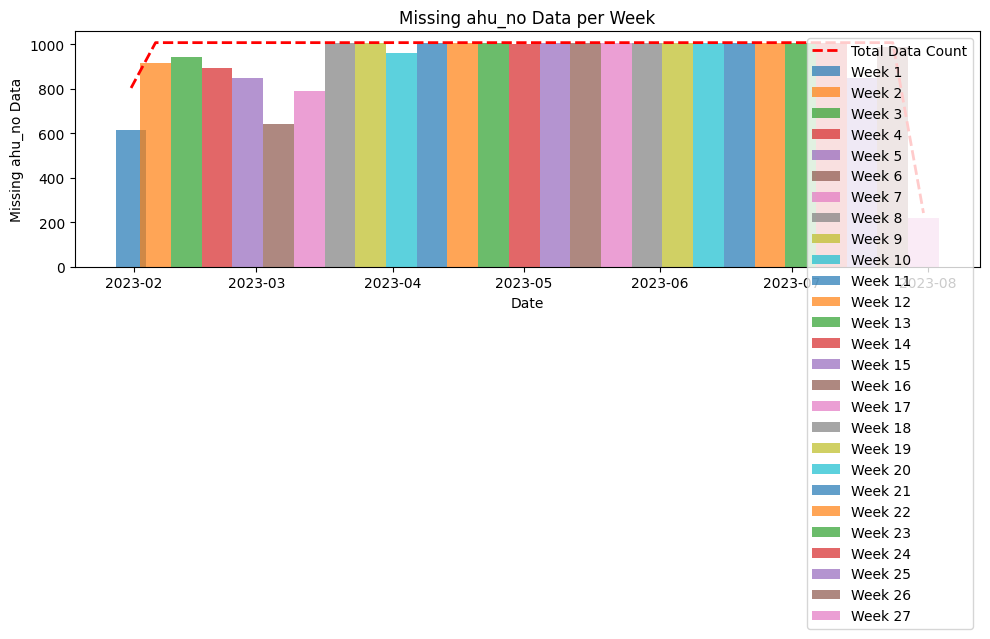

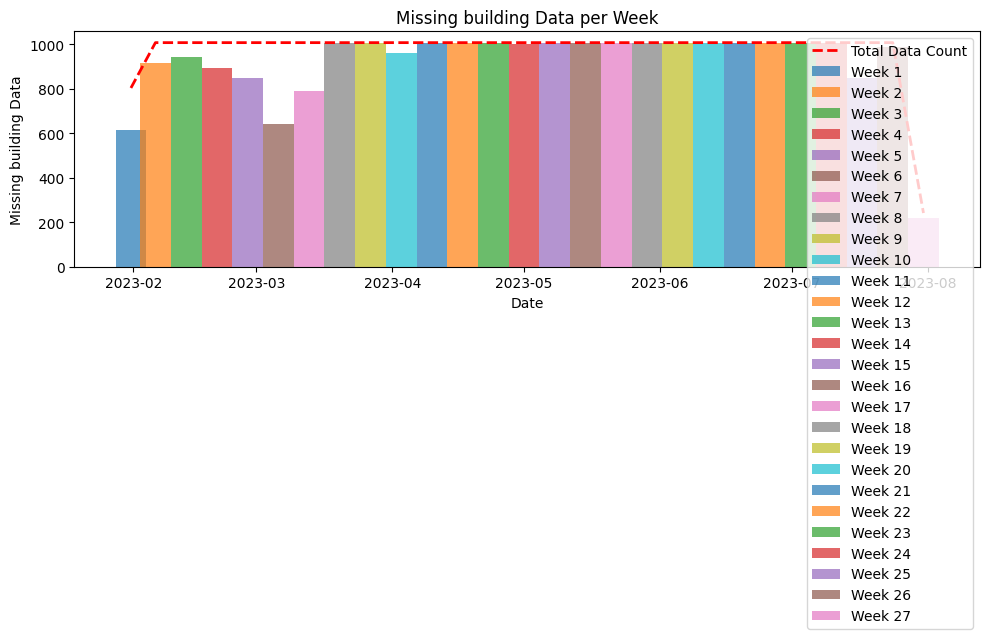

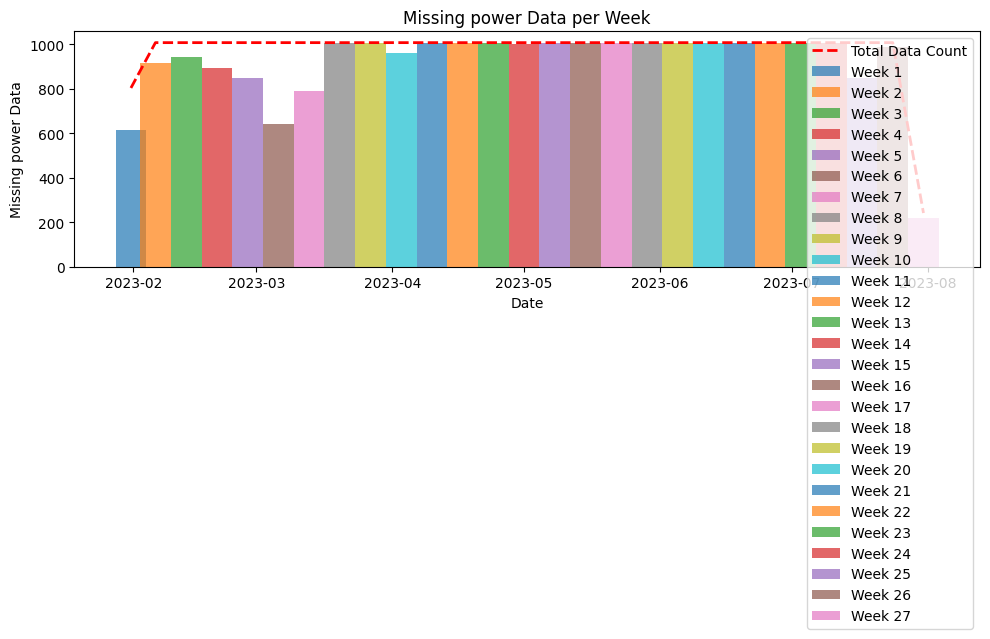

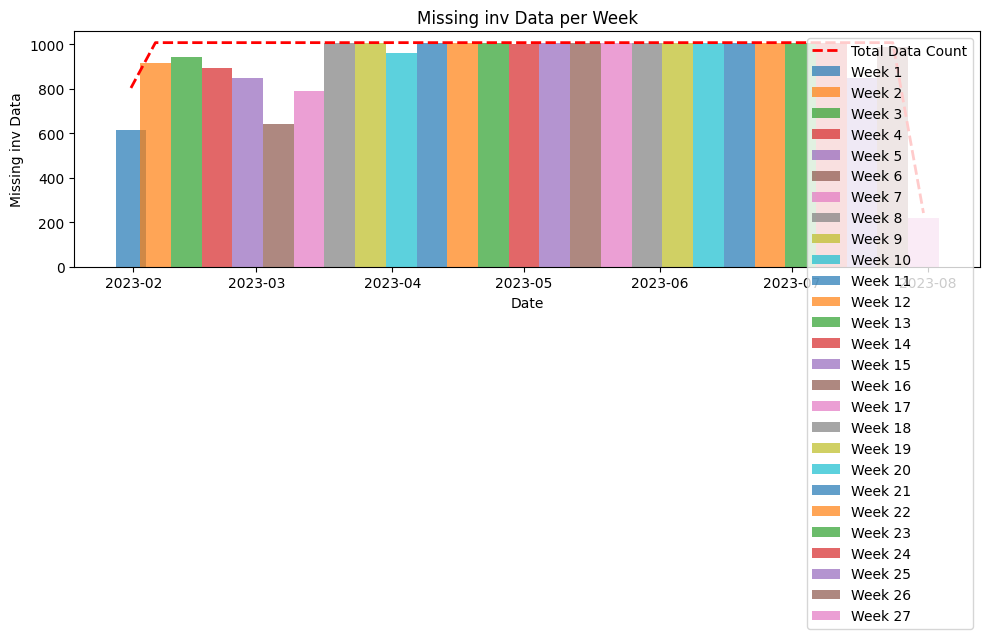

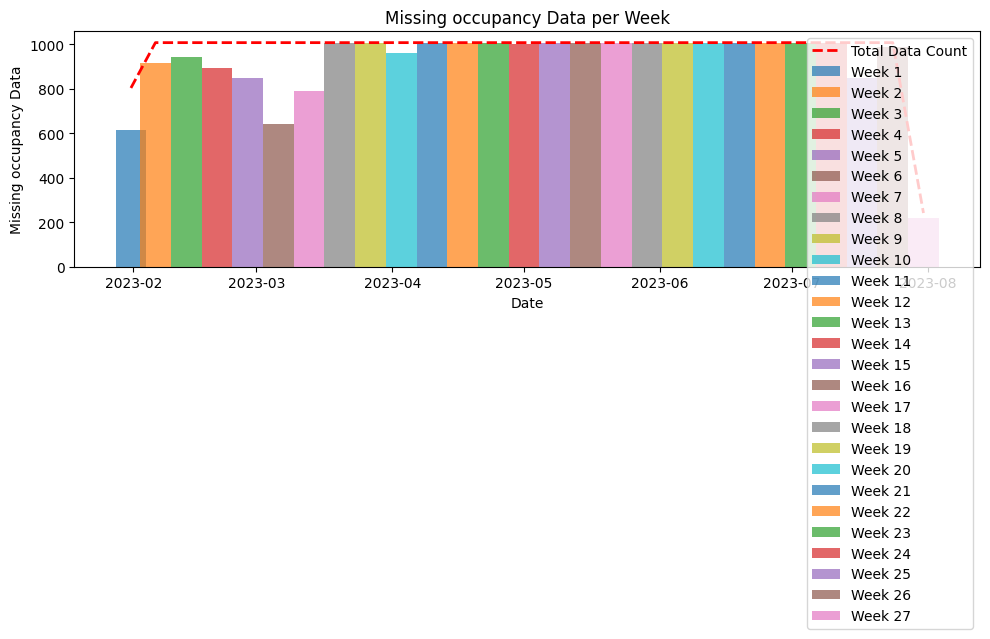

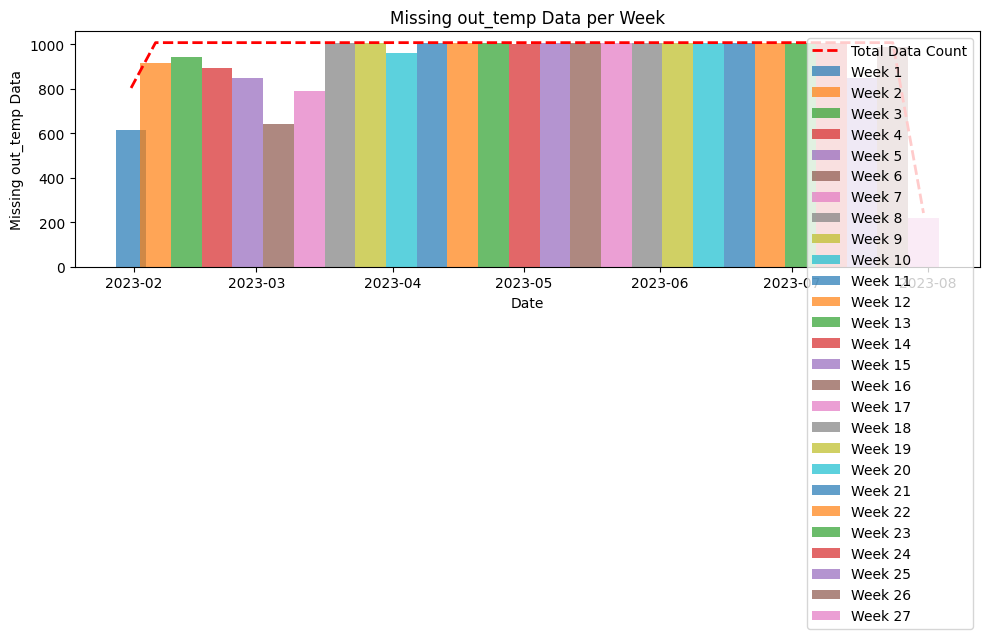

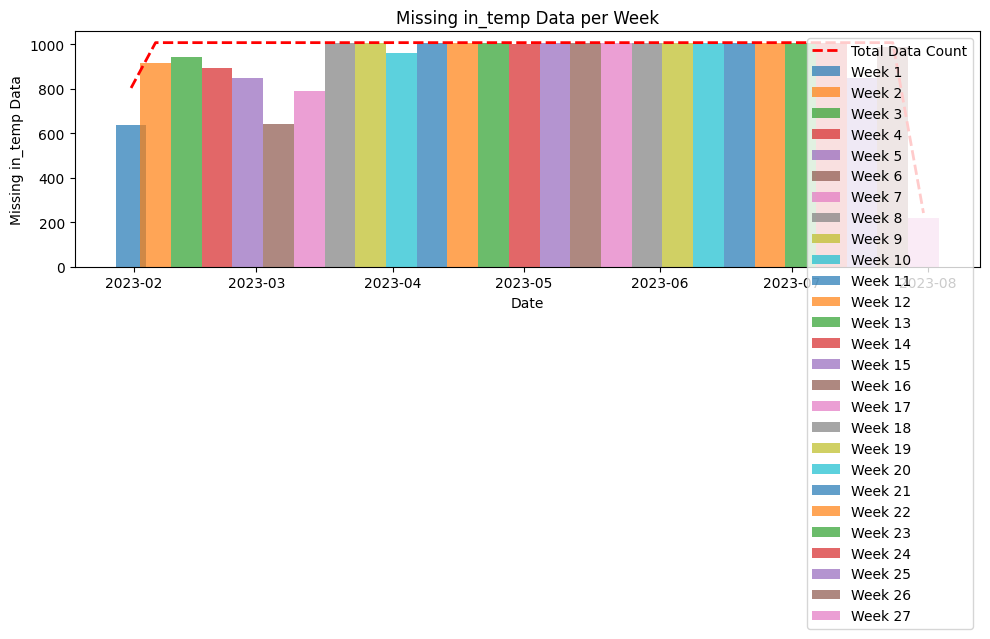

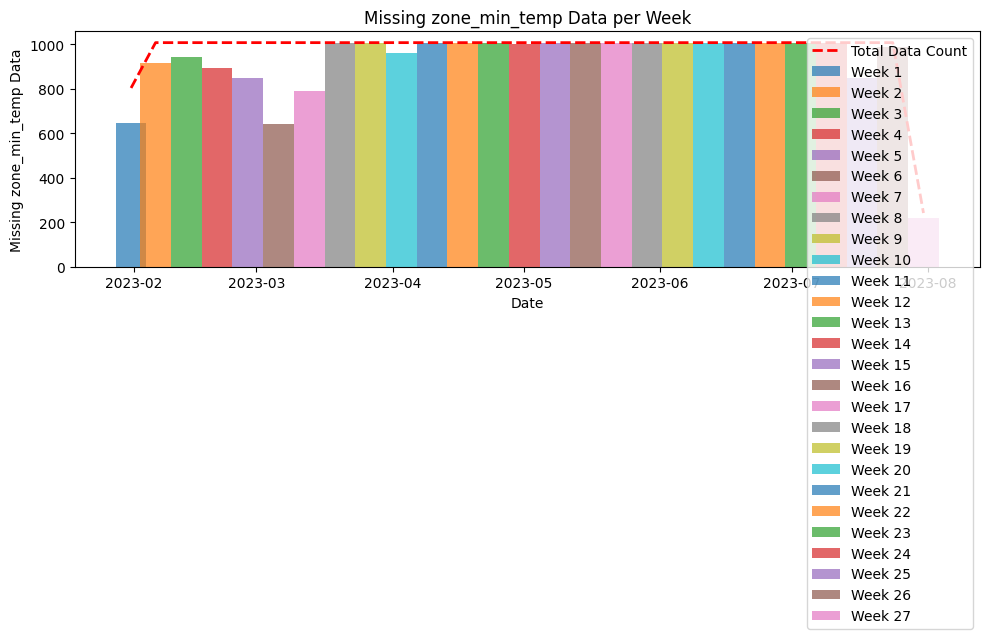

In [ ]:
ahu10 = ahu_dict[1]

import matplotlib.pyplot as plt

# 주차별로 데이터 분리
weeks = ahu10.groupby(pd.Grouper(level=0, freq='W'))

features = ahu10.columns

for feature in features:
    plt.figure(figsize=(10, 5))

    total_data_counts = []  # 각 주차별로 누적된 전체 데이터 개수를 저장하기 위한 리스트
    week_start_dates = []  # 각 주차의 시작 날짜를 저장하기 위한 리스트

    for week_number, week_data in enumerate(weeks):
        week_start_date = week_data[1].index.min()
        week_end_date = week_data[1].index.max()

        # 결측치 계산
        missing_data = week_data[1][feature].isnull().sum()

        # 주차별로 결측치를 막대 그래프로 시각화
        plt.bar(week_start_date, missing_data, width=7, label=f'Week {week_number + 1}', alpha=0.7)

        # 전체 데이터 개수 계산 및 저장
        total_data_count = len(week_data[1])
        total_data_counts.append(total_data_count)
        week_start_dates.append(week_start_date)

    # 빨간색 선 그래프로 전체 데이터 개수를 나타냅니다.
    plt.plot(week_start_dates, total_data_counts, color='red', label='Total Data Count', linewidth=2, linestyle='--')

    plt.xlabel('Date')
    plt.ylabel(f'Missing {feature} Data')
    plt.title(f'Missing {feature} Data per Week')
    plt.legend()
    plt.tight_layout()
    plt.show()

# chiller

In [ ]:
chiller_no = chiller[chiller['chiller_no']==1]
chiller_no

,no,chiller_no,step,temp,power,inv,cdate
0,1,1,NaN,NaN,1,40,2023-01-30 13:15:00
1,2,1,NaN,NaN,1,40,2023-01-31 10:18:00
3,4,1,NaN,NaN,1,40,2023-01-31 10:20:00
4,5,1,NaN,NaN,1,40,2023-01-31 10:21:00
5,6,1,NaN,NaN,1,40,2023-01-31 10:21:00
...,...,...,...,...,...,...,...
4052,4053,1,3,31.385,1,41,2023-08-01 15:20:00
4053,4054,1,3,31.405,1,41,2023-08-01 15:30:00
4054,4055,1,3,31.315,1,41,2023-08-01 15:40:00
4055,4056,1,3,31.32,1,41,2023-08-01 15:50:00


In [ ]:
start_date = '2023-01-31 10:00:00'
end_date = '2023-08-01 16:00:00'

date_range = pd.date_range(start=start_date, end=end_date, freq='10T')

chiller1 = chiller_no.set_index('cdate')
chiller1 = chiller1.loc[~chiller1.index.duplicated(keep='first')]
chiller1 = chiller1.reindex(date_range)

chiller1

,no,chiller_no,step,temp,power,inv
2023-01-31 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-31 10:10:00,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-31 10:20:00,4.0,1.0,NaN,NaN,1.0,40.0
2023-01-31 10:30:00,9.0,1.0,NaN,NaN,1.0,40.0
2023-01-31 10:40:00,10.0,1.0,NaN,NaN,1.0,40.0
...,...,...,...,...,...,...
2023-08-01 15:20:00,4053.0,1.0,3,31.385,1.0,41.0
2023-08-01 15:30:00,4054.0,1.0,3,31.405,1.0,41.0
2023-08-01 15:40:00,4055.0,1.0,3,31.315,1.0,41.0
2023-08-01 15:50:00,4056.0,1.0,3,31.32,1.0,41.0


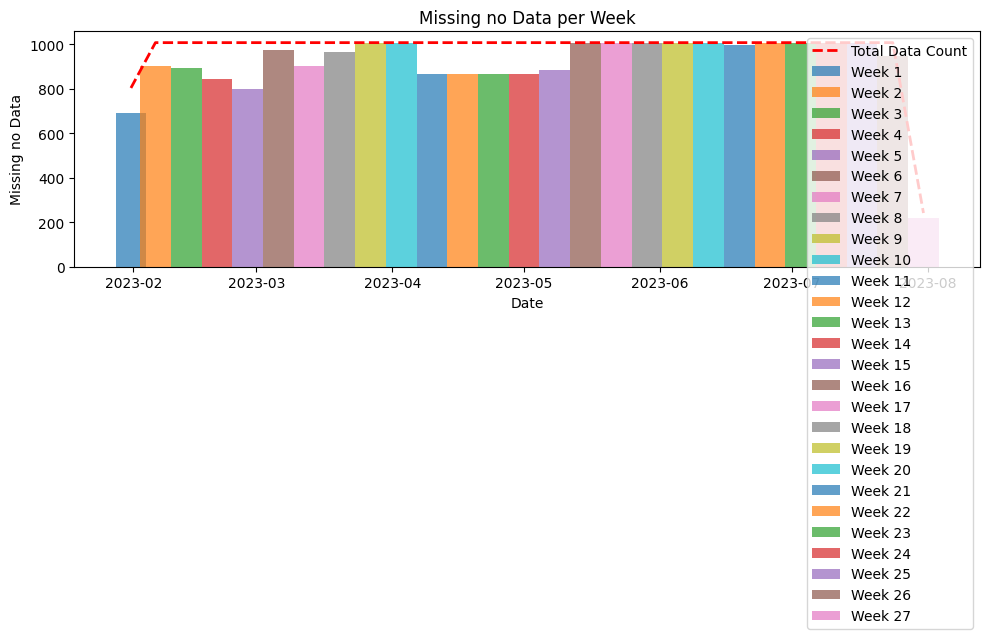

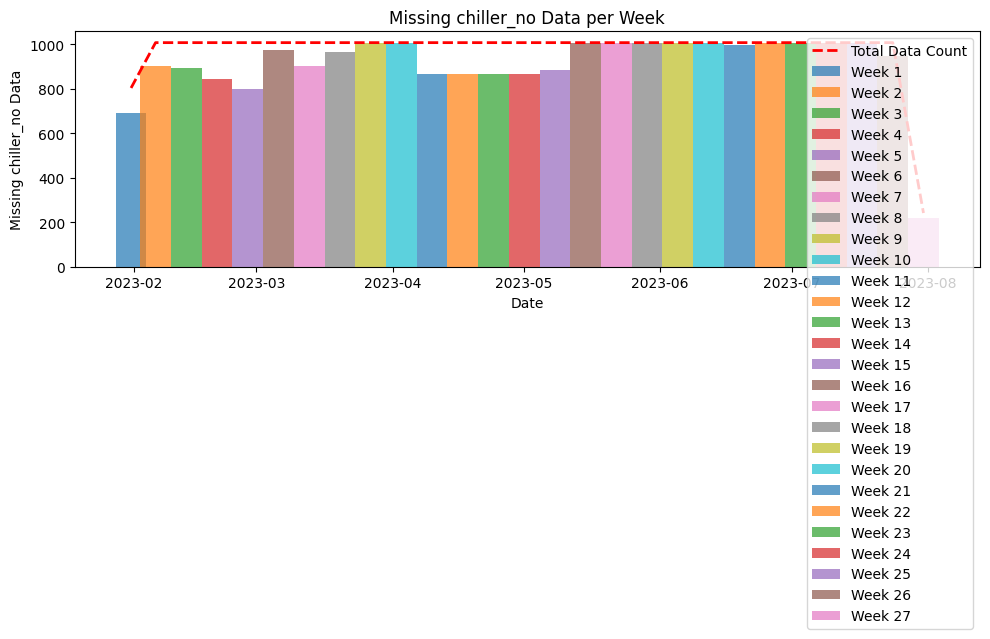

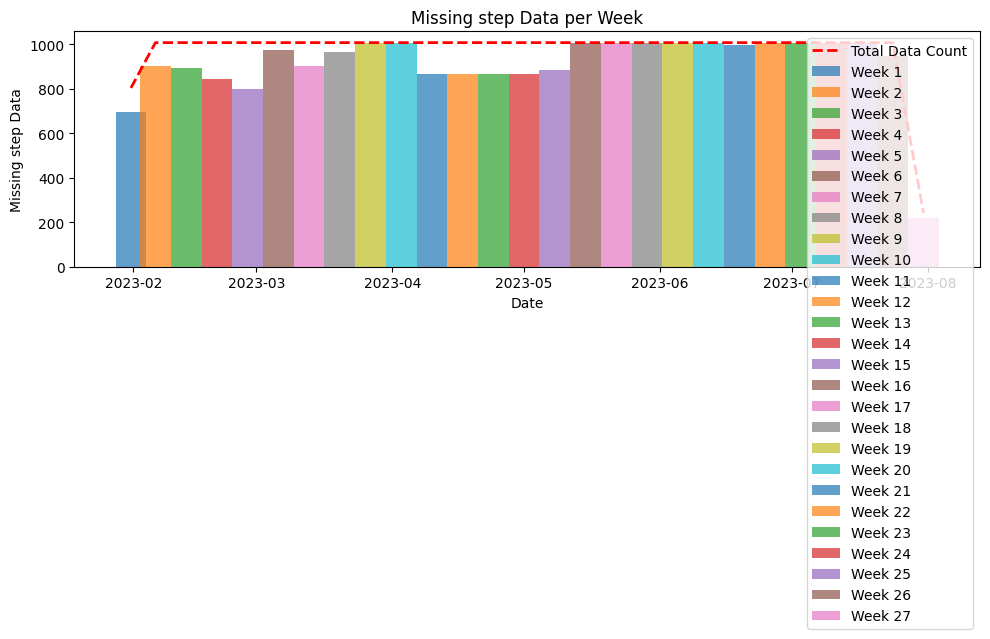

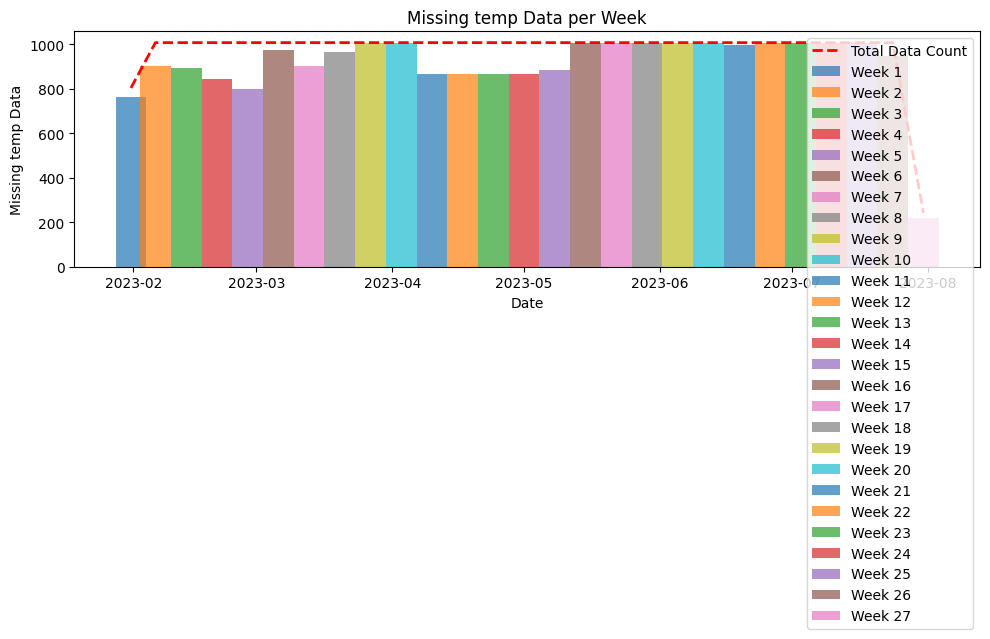

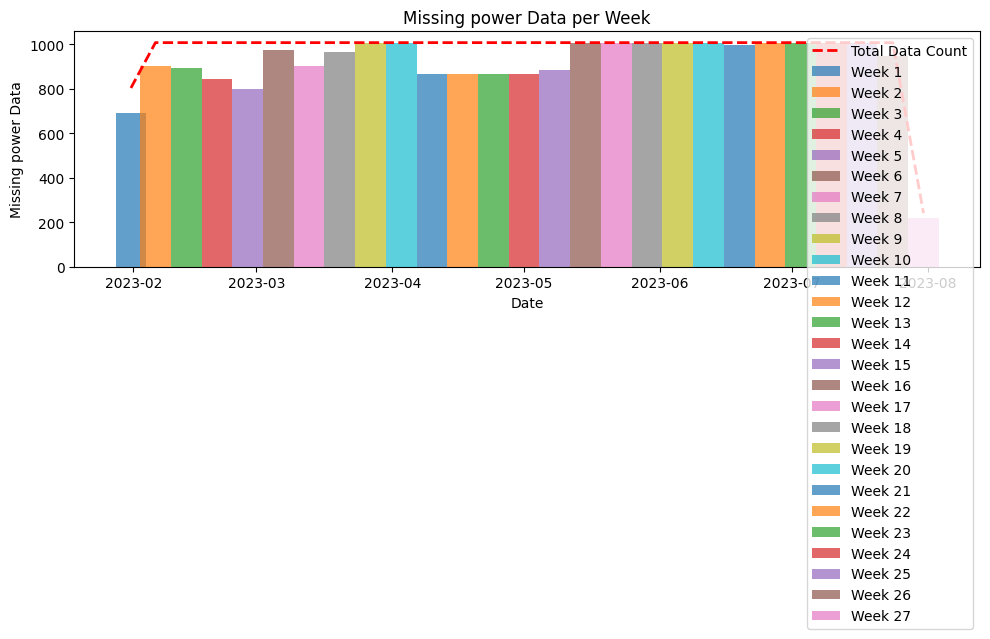

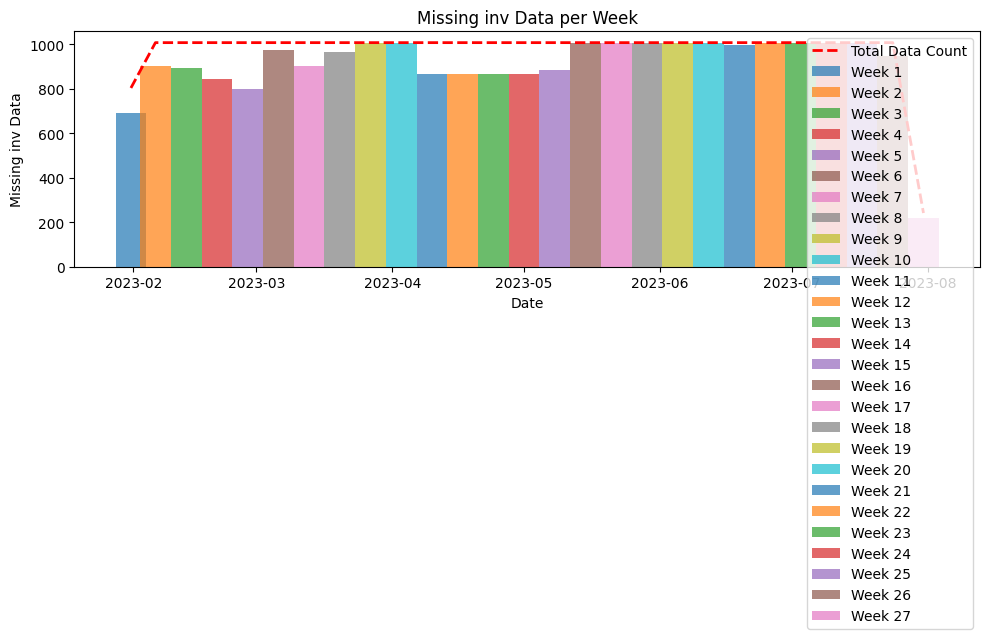

In [ ]:
import matplotlib.pyplot as plt

# 주차별로 데이터 분리
weeks = chiller1.groupby(pd.Grouper(level=0, freq='W'))

features = chiller1.columns

for feature in features:
    plt.figure(figsize=(10, 5))

    total_data_counts = []  # 각 주차별로 누적된 전체 데이터 개수를 저장하기 위한 리스트
    week_start_dates = []  # 각 주차의 시작 날짜를 저장하기 위한 리스트

    for week_number, week_data in enumerate(weeks):
        week_start_date = week_data[1].index.min()
        week_end_date = week_data[1].index.max()

        # 결측치 계산
        missing_data = week_data[1][feature].isnull().sum()

        # 주차별로 결측치를 막대 그래프로 시각화
        plt.bar(week_start_date, missing_data, width=7, label=f'Week {week_number + 1}', alpha=0.7)

        # 전체 데이터 개수 계산 및 저장
        total_data_count = len(week_data[1])
        total_data_counts.append(total_data_count)
        week_start_dates.append(week_start_date)

    # 빨간색 선 그래프로 전체 데이터 개수를 나타냅니다.
    plt.plot(week_start_dates, total_data_counts, color='red', label='Total Data Count', linewidth=2, linestyle='--')

    plt.xlabel('Date')
    plt.ylabel(f'Missing {feature} Data')
    plt.title(f'Missing {feature} Data per Week')
    plt.legend()
    plt.tight_layout()
    plt.show()

# e

In [ ]:
len(set(e.id))

41

In [ ]:
e_group = e.groupby('id')

e_dict0 = {}
for name, group_df in e_group:
  e_dict0[name] = group_df

In [ ]:
e1 = e_dict0['c2-04-d8-a0-1d-58-c7-b8']
e1['cdate'] = pd.to_datetime(e1['cdate'])

# 초(second)를 00으로
e1['cdate'] = e1['cdate'].dt.floor('min')

e1

,no,id,seq,type,val,rv,ri,sv,si,tv,ti,fire,temperature,humidity,cdate
0,3640033,c2-04-d8-a0-1d-58-c7-b8,345,2,169.495,0.7,0.2065,0.7,0.2655,0.7,0.2714,255,33.79,33.67,2023-01-01 00:00:00
41,3640074,c2-04-d8-a0-1d-58-c7-b8,346,2,166.805,0.7,0.2006,0.7,0.2655,0.6,0.2655,255,33.78,33.61,2023-01-01 00:01:00
82,3640115,c2-04-d8-a0-1d-58-c7-b8,347,2,169.495,0.7,0.2065,0.7,0.2596,0.7,0.2773,255,33.79,33.71,2023-01-01 00:02:00
122,3640155,c2-04-d8-a0-1d-58-c7-b8,348,2,168.150,0.6,0.2006,0.7,0.2655,0.6,0.2714,255,33.80,33.78,2023-01-01 00:03:00
164,3640197,c2-04-d8-a0-1d-58-c7-b8,349,2,169.495,0.7,0.2065,0.7,0.2655,0.6,0.2714,255,33.72,33.65,2023-01-01 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12414141,16054174,c2-04-d8-a0-1d-58-c7-b8,541,2,9939.680,0.7,15.9890,0.7,13.2986,0.7,14.3075,255,36.80,46.80,2023-08-01 16:09:00
12414182,16054215,c2-04-d8-a0-1d-58-c7-b8,542,2,9868.390,0.7,15.8887,0.7,13.1452,0.6,14.2485,255,36.74,46.87,2023-08-01 16:10:00
12414223,16054256,c2-04-d8-a0-1d-58-c7-b8,543,2,9971.970,0.6,16.0657,0.7,13.3458,0.7,14.3252,255,36.70,46.82,2023-08-01 16:11:00
12414264,16054297,c2-04-d8-a0-1d-58-c7-b8,544,2,9922.200,0.7,15.9890,0.7,13.2632,0.7,14.2662,255,36.82,46.91,2023-08-01 16:12:00


In [ ]:
start_date = '2023-01-31 10:00:00'
end_date = '2023-08-01 16:00:00'

date_range = pd.date_range(start=start_date, end=end_date, freq='10T')

e1_p = e1.set_index('cdate')
e1_p = e1_p.loc[~e1_p.index.duplicated(keep='first')]
e1_p = e1_p.reindex(date_range)
e1_p

,no,id,seq,type,val,rv,ri,sv,si,tv,ti,fire,temperature,humidity
2023-01-31 10:00:00,5427481.0,c2-04-d8-a0-1d-58-c7-b8,943.0,2.0,165.46,0.7,0.2006,0.7,0.2596,0.6,0.2655,255.0,31.34,30.43
2023-01-31 10:10:00,5427894.0,c2-04-d8-a0-1d-58-c7-b8,953.0,2.0,165.46,0.7,0.2065,0.7,0.2596,0.7,0.2596,255.0,31.32,29.77
2023-01-31 10:20:00,5428298.0,c2-04-d8-a0-1d-58-c7-b8,963.0,2.0,10367.50,0.6,16.1955,0.7,14.2721,0.7,15.0037,255.0,31.25,29.39
2023-01-31 10:30:00,5428708.0,c2-04-d8-a0-1d-58-c7-b8,973.0,2.0,10399.70,0.7,16.3076,0.7,14.3252,0.7,14.9801,255.0,31.34,28.79
2023-01-31 10:40:00,5429118.0,c2-04-d8-a0-1d-58-c7-b8,983.0,2.0,10372.80,0.7,16.1011,0.7,14.2190,0.7,15.1748,255.0,31.48,28.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01 15:20:00,16052169.0,c2-04-d8-a0-1d-58-c7-b8,492.0,2.0,10000.20,0.7,16.1660,0.7,13.3694,0.7,14.3252,255.0,36.70,45.11
2023-08-01 15:30:00,16052579.0,c2-04-d8-a0-1d-58-c7-b8,502.0,2.0,9930.27,0.7,16.0303,0.7,13.2396,0.7,14.2839,255.0,36.61,45.42
2023-08-01 15:40:00,16052989.0,c2-04-d8-a0-1d-58-c7-b8,512.0,2.0,10008.30,0.7,16.2840,0.7,13.2337,0.7,14.3783,255.0,36.71,45.72
2023-08-01 15:50:00,16053399.0,c2-04-d8-a0-1d-58-c7-b8,522.0,2.0,10025.80,0.7,16.1660,0.7,13.4048,0.7,14.4019,255.0,36.68,46.23


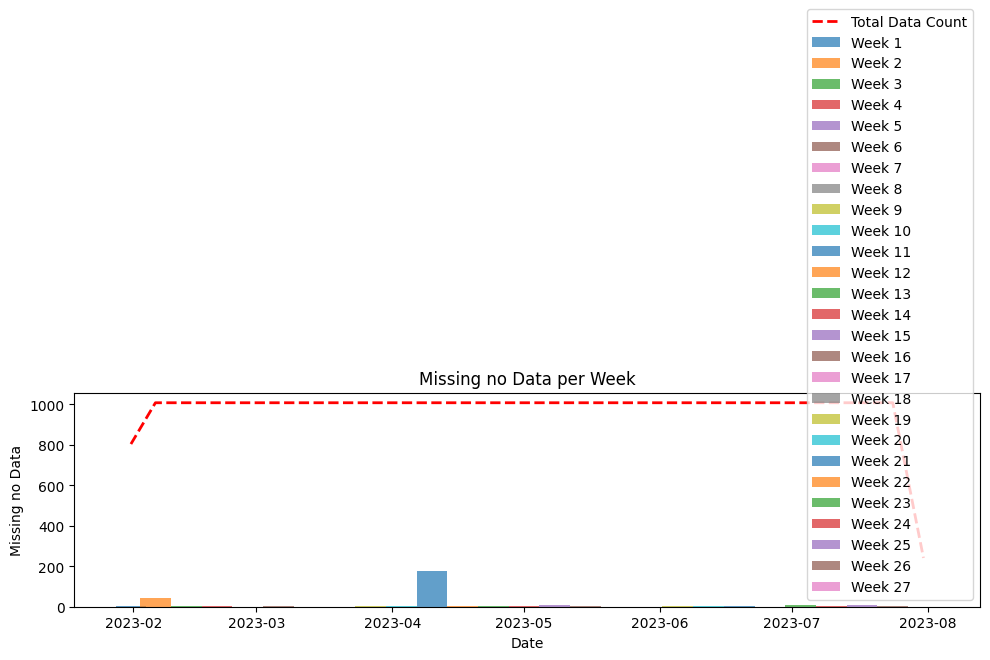

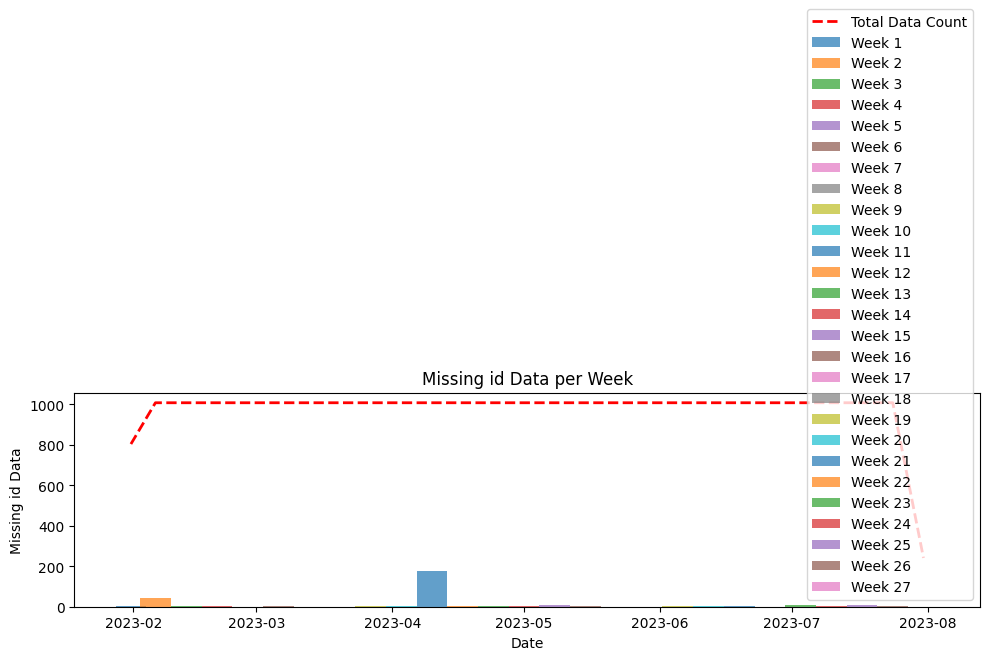

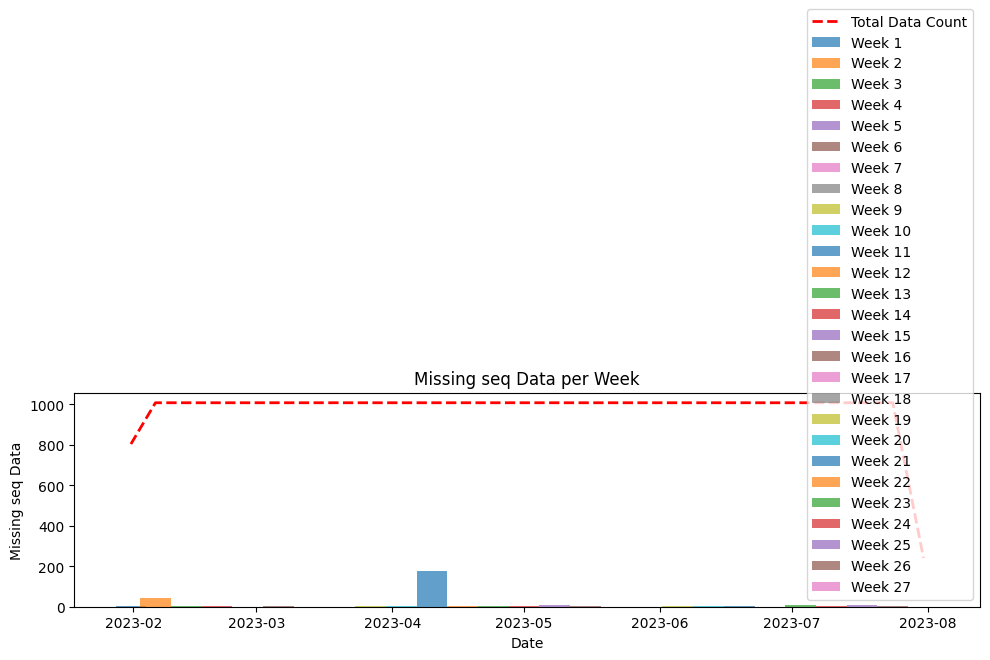

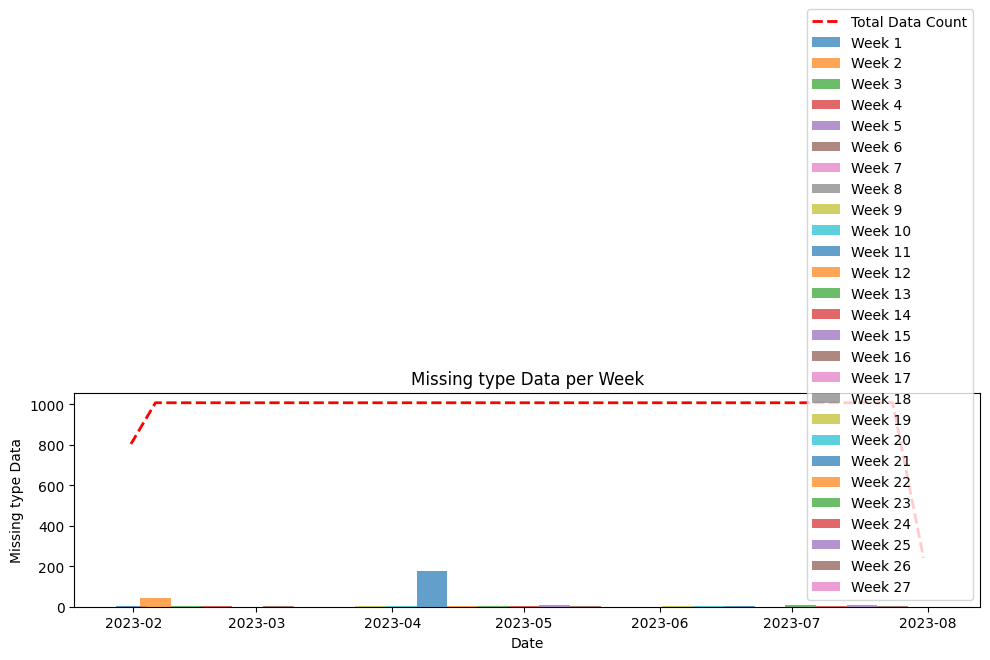

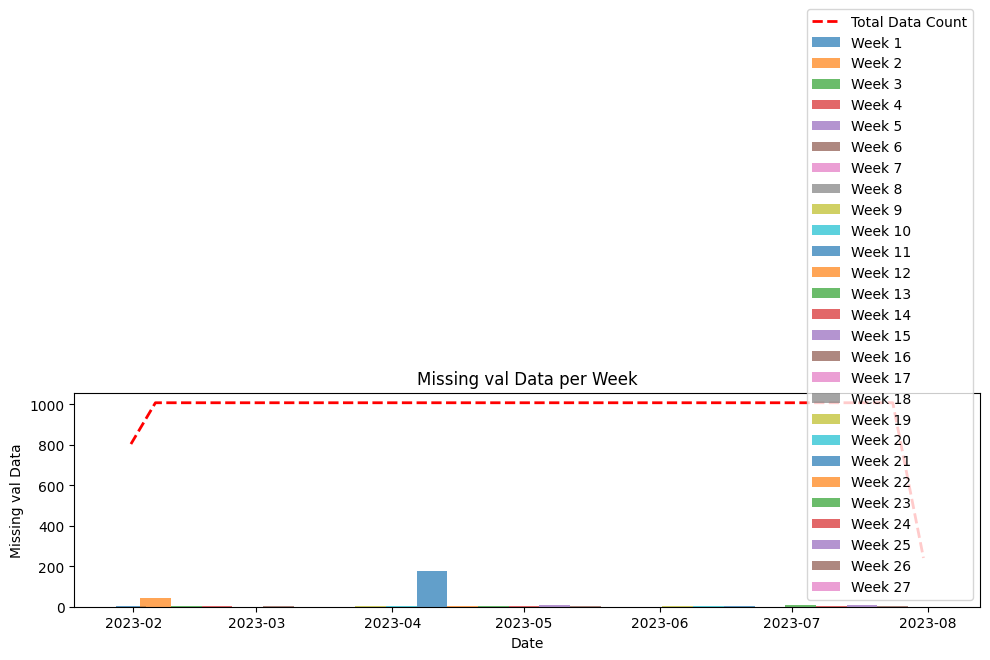

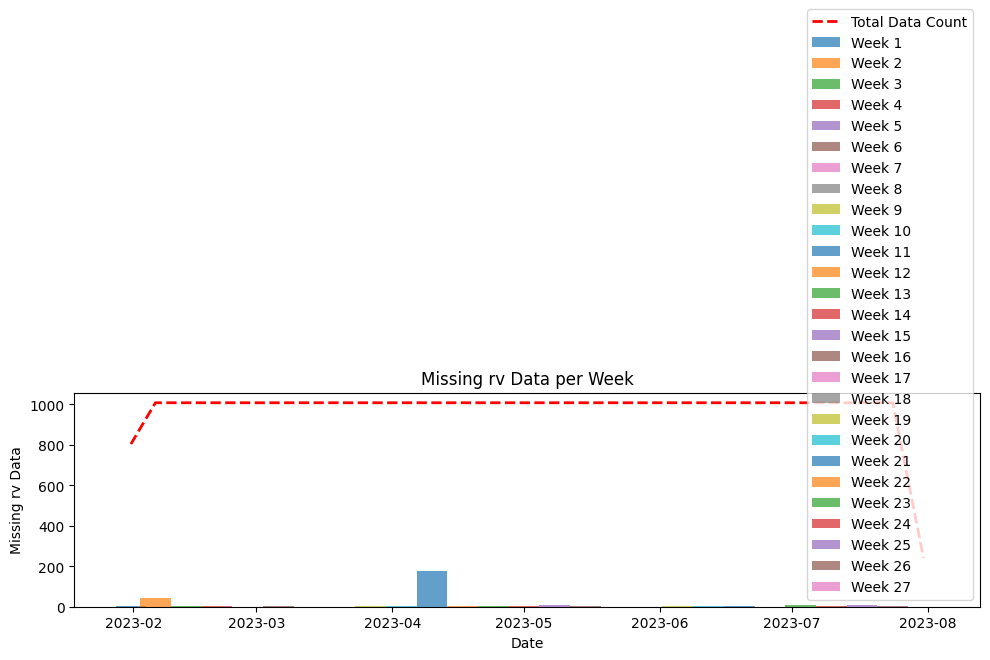

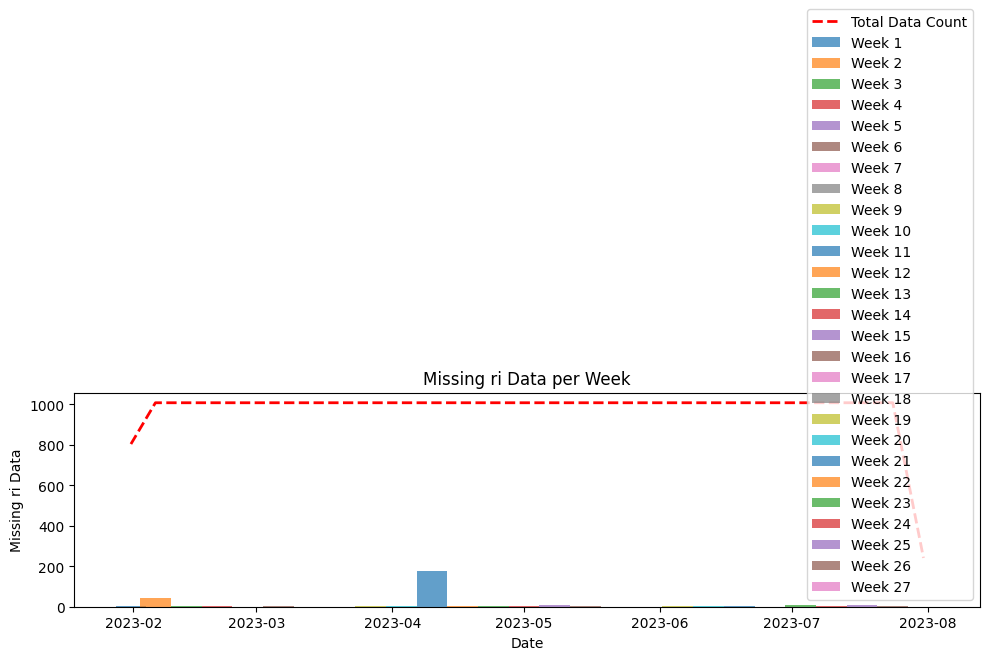

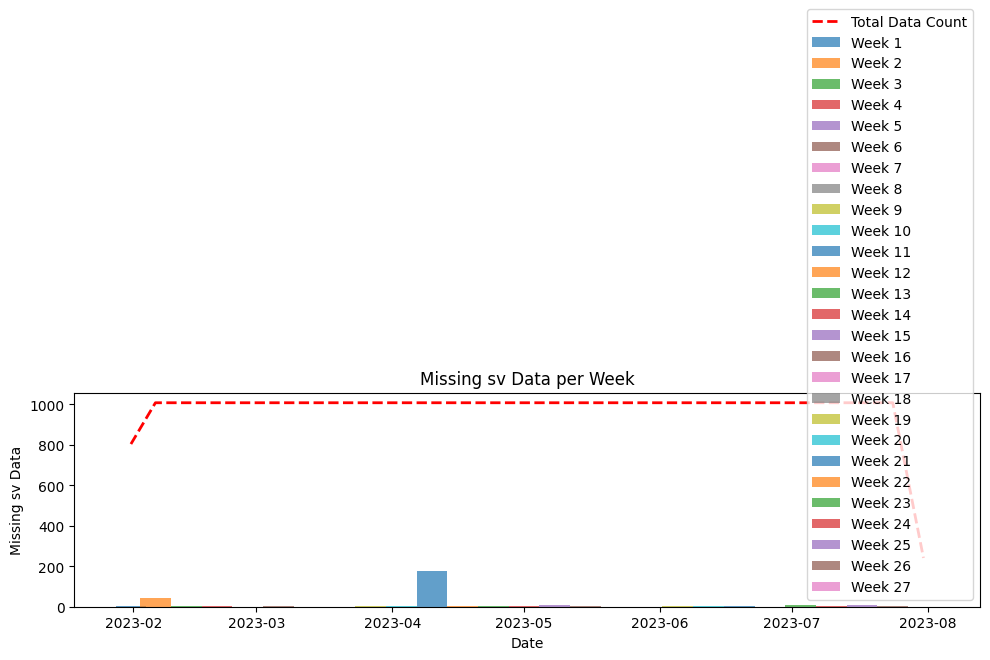

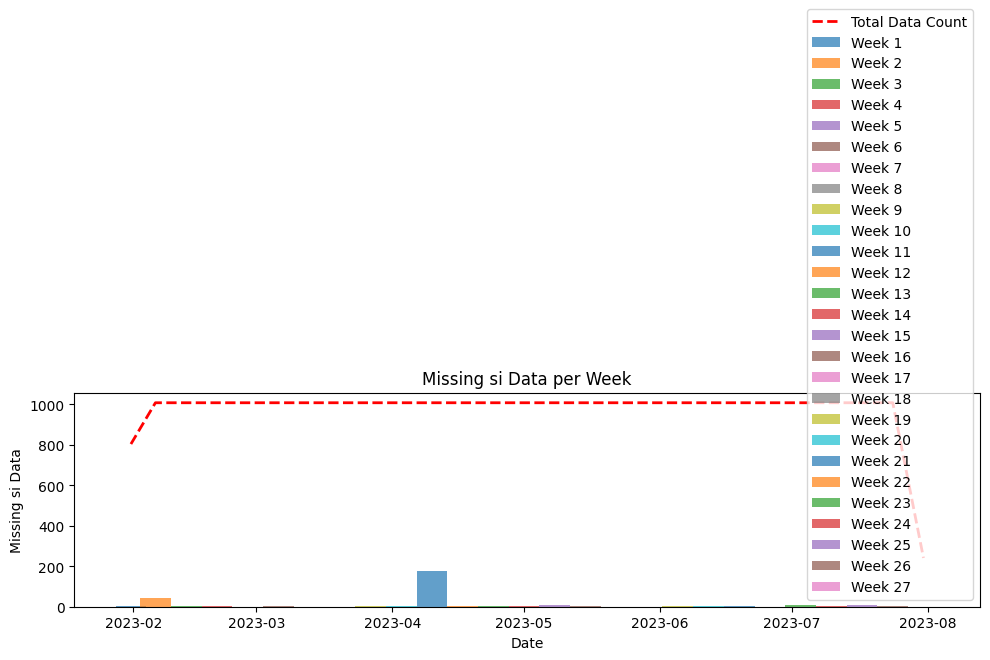

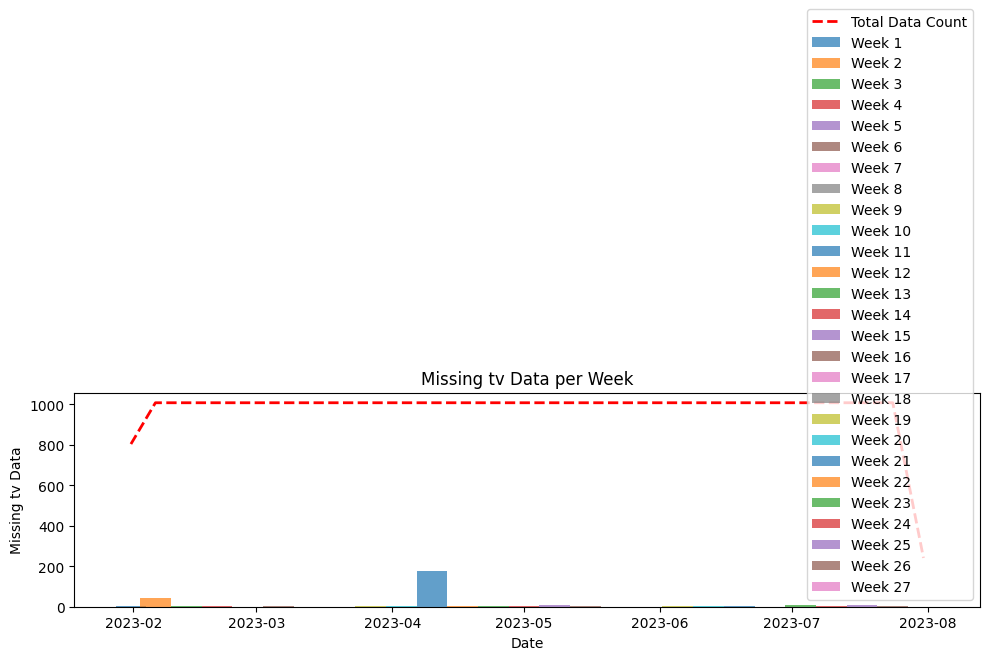

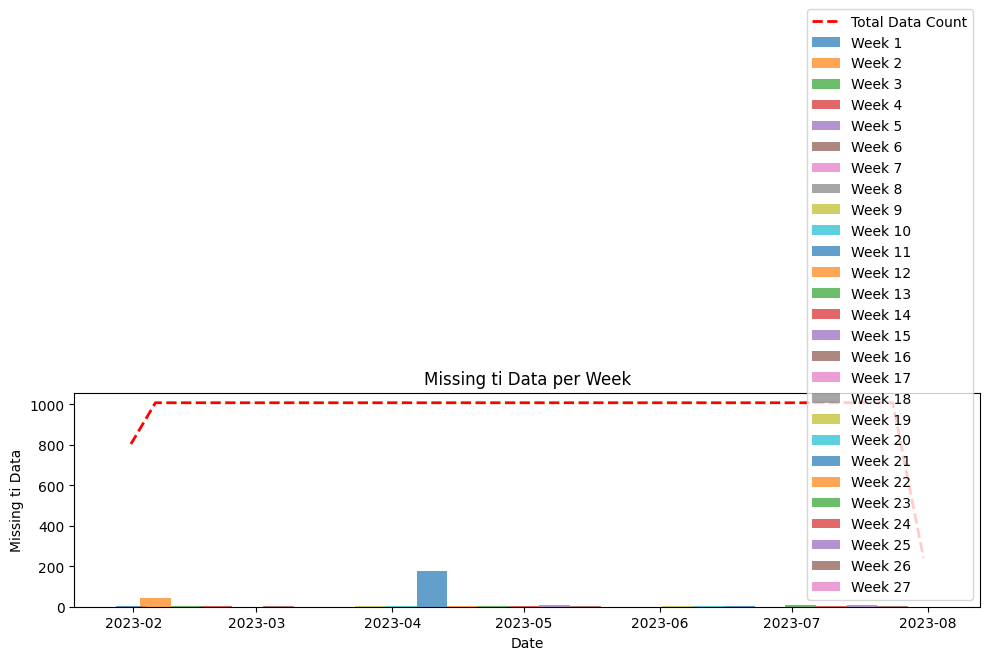

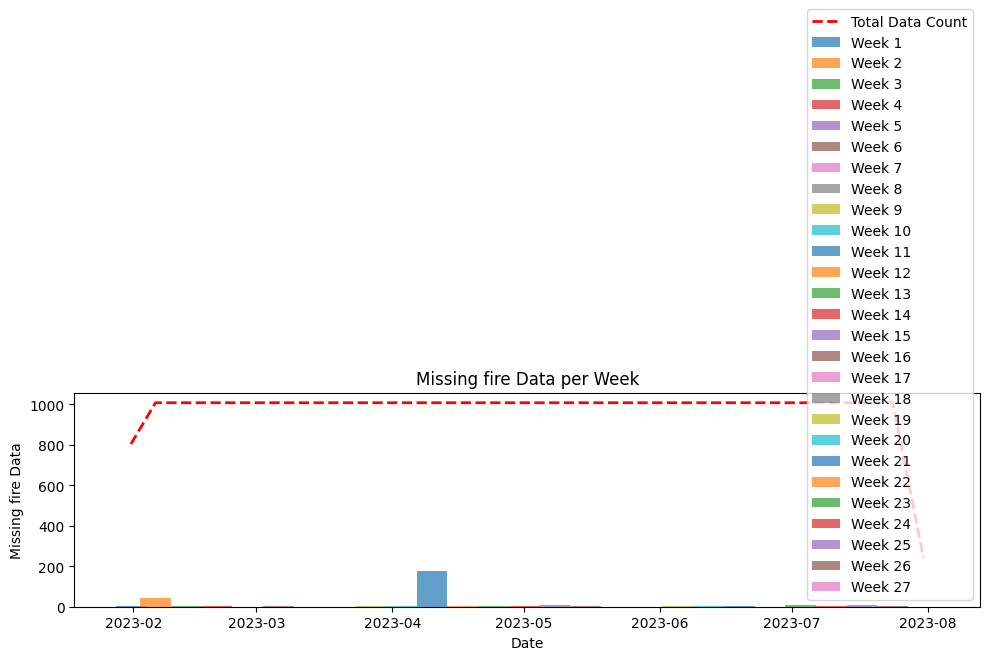

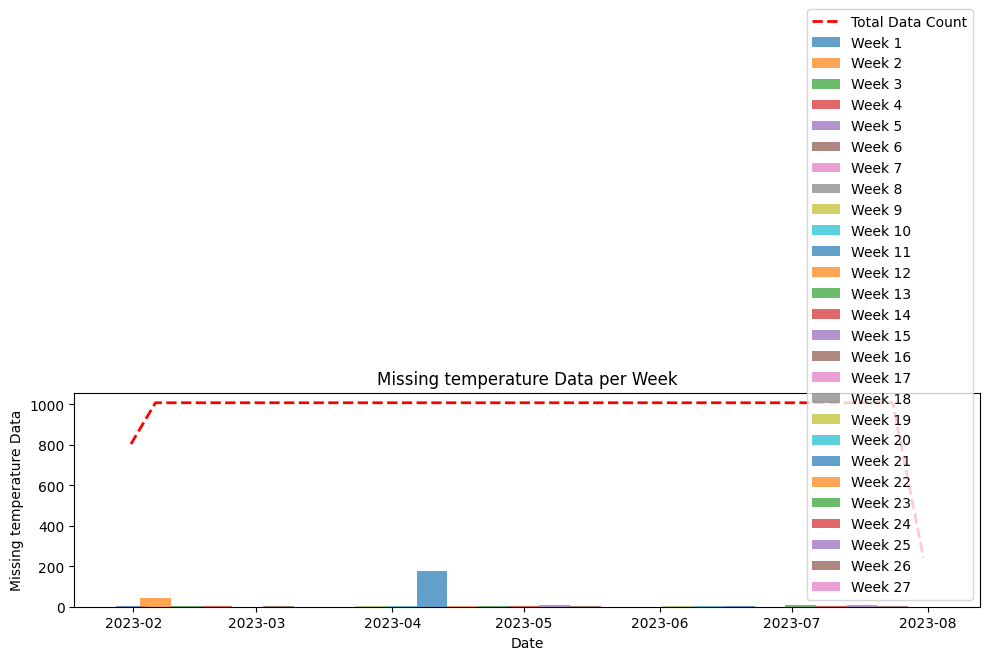

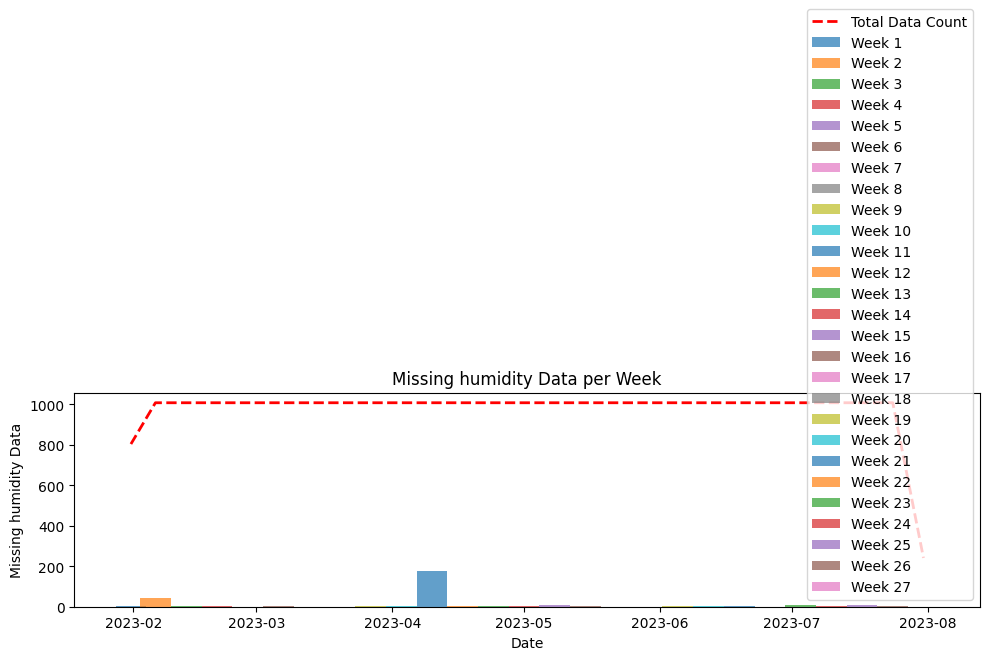

In [ ]:
import matplotlib.pyplot as plt

# 주차별로 데이터 분리
weeks = e1_p.groupby(pd.Grouper(level=0, freq='W'))

features = e1_p.columns

for feature in features:
    plt.figure(figsize=(10, 5))

    total_data_counts = []  # 각 주차별로 누적된 전체 데이터 개수를 저장하기 위한 리스트
    week_start_dates = []  # 각 주차의 시작 날짜를 저장하기 위한 리스트

    for week_number, week_data in enumerate(weeks):
        week_start_date = week_data[1].index.min()
        week_end_date = week_data[1].index.max()

        # 결측치 계산
        missing_data = week_data[1][feature].isnull().sum()

        # 주차별로 결측치를 막대 그래프로 시각화
        plt.bar(week_start_date, missing_data, width=7, label=f'Week {week_number + 1}', alpha=0.7)

        # 전체 데이터 개수 계산 및 저장
        total_data_count = len(week_data[1])
        total_data_counts.append(total_data_count)
        week_start_dates.append(week_start_date)

    # 빨간색 선 그래프로 전체 데이터 개수를 나타냅니다.
    plt.plot(week_start_dates, total_data_counts, color='red', label='Total Data Count', linewidth=2, linestyle='--')

    plt.xlabel('Date')
    plt.ylabel(f'Missing {feature} Data')
    plt.title(f'Missing {feature} Data per Week')
    plt.legend()
    plt.tight_layout()
    plt.show()

# plant

In [ ]:
plant.head()

,no,id,seq,air,monoxide,dioxide,pm2d5,pm10,temperature,humidit,score,cdate
0,1333503,c2-01-d8-a0-1d-58-cf-4c,912,25,0,400,13,14,25.86,42.61,\N,2023-01-01 00:00:01
1,1333504,c2-01-d8-a0-1d-58-65-44,337,104,0,400,14,15,26.23,42.56,\N,2023-01-01 00:00:09
2,1333505,c2-01-d8-a0-1d-58-ce-74,663,0,1,447,15,17,27.17,41.22,\N,2023-01-01 00:00:18
3,1333506,c2-01-d8-a0-1d-59-b4-14,943,29,0,413,23,26,25.41,46.23,\N,2023-01-01 00:00:19
4,1333507,c2-01-d8-a0-1d-58-68-a4,888,164,0,585,11,12,26.17,36.11,\N,2023-01-01 00:00:26


In [ ]:
len(set(plant.id))

15

In [ ]:
plant_group = plant.groupby('id')

plant_dict0 = {}
for name, group_df in plant_group:
  plant_dict0[name] = group_df

In [ ]:
plant1 = plant_dict0['c2-01-d8-a0-1d-58-cf-4c']
plant1['cdate'] = pd.to_datetime(plant1['cdate'])

plant1['cdate'] = plant1['cdate'].dt.floor('min')

plant1

,no,id,seq,air,monoxide,dioxide,pm2d5,pm10,temperature,humidit,score,cdate
0,1333503,c2-01-d8-a0-1d-58-cf-4c,912,25,0,400,13,14,25.86,42.61,\N,2023-01-01 00:00:00
15,1333518,c2-01-d8-a0-1d-58-cf-4c,913,44,0,400,14,15,25.87,42.61,\N,2023-01-01 00:01:00
30,1333533,c2-01-d8-a0-1d-58-cf-4c,914,55,0,400,13,14,25.87,42.75,\N,2023-01-01 00:02:00
45,1333548,c2-01-d8-a0-1d-58-cf-4c,915,44,1,400,12,13,25.87,42.68,\N,2023-01-01 00:03:00
60,1333563,c2-01-d8-a0-1d-58-cf-4c,916,35,0,400,14,15,25.86,42.60,\N,2023-01-01 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...
4476554,5810057,c2-01-d8-a0-1d-58-cf-4c,535,0,0,624,6,7,27.10,49.03,\N,2023-08-01 16:10:00
4476569,5810072,c2-01-d8-a0-1d-58-cf-4c,536,0,0,617,5,5,27.10,48.90,\N,2023-08-01 16:11:00
4476584,5810087,c2-01-d8-a0-1d-58-cf-4c,537,0,0,613,6,6,27.13,49.46,\N,2023-08-01 16:12:00
4476599,5810102,c2-01-d8-a0-1d-58-cf-4c,538,0,0,610,5,5,27.13,48.43,\N,2023-08-01 16:13:00


In [ ]:
start_date = '2023-01-31 10:00:00'
end_date = '2023-08-01 16:00:00'

date_range = pd.date_range(start=start_date, end=end_date, freq='10T')

plant1_p = plant1.set_index('cdate')
plant1_p = plant1_p.loc[~plant1_p.index.duplicated(keep='first')]
plant1_p = plant1_p.reindex(date_range)
plant1_p

,no,id,seq,air,monoxide,dioxide,pm2d5,pm10,temperature,humidit,score
2023-01-31 10:00:00,1981925.0,c2-01-d8-a0-1d-58-cf-4c,966.0,363,4.0,701,69,78,25.21,39.45,\N
2023-01-31 10:10:00,1982076.0,c2-01-d8-a0-1d-58-cf-4c,976.0,350,3.0,682,62,70,24.74,39.24,\N
2023-01-31 10:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-31 10:30:00,1982360.0,c2-01-d8-a0-1d-58-cf-4c,995.0,112,4.0,648,66,75,24.15,38.60,\N
2023-01-31 10:40:00,1982510.0,c2-01-d8-a0-1d-58-cf-4c,1005.0,60,4.0,624,63,73,23.96,38.34,\N
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01 15:20:00,5809309.0,c2-01-d8-a0-1d-58-cf-4c,485.0,0,0.0,620,5,5,27.20,47.11,\N
2023-08-01 15:30:00,5809459.0,c2-01-d8-a0-1d-58-cf-4c,495.0,0,0.0,661,5,5,27.18,47.15,\N
2023-08-01 15:40:00,5809609.0,c2-01-d8-a0-1d-58-cf-4c,505.0,0,0.0,636,5,5,27.12,46.66,\N
2023-08-01 15:50:00,5809759.0,c2-01-d8-a0-1d-58-cf-4c,515.0,0,0.0,628,6,6,27.12,46.38,\N


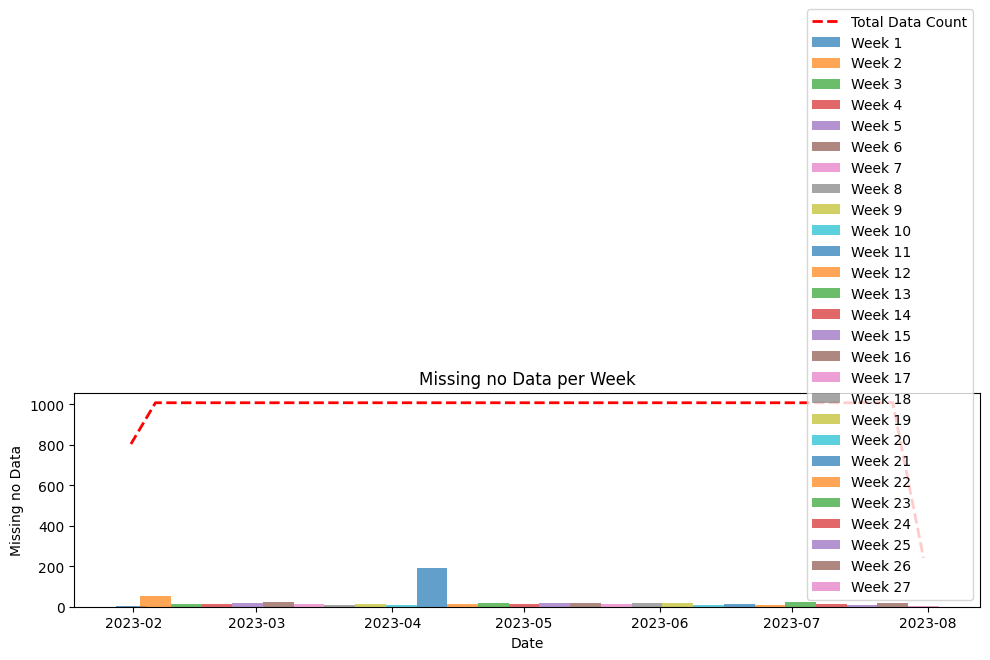

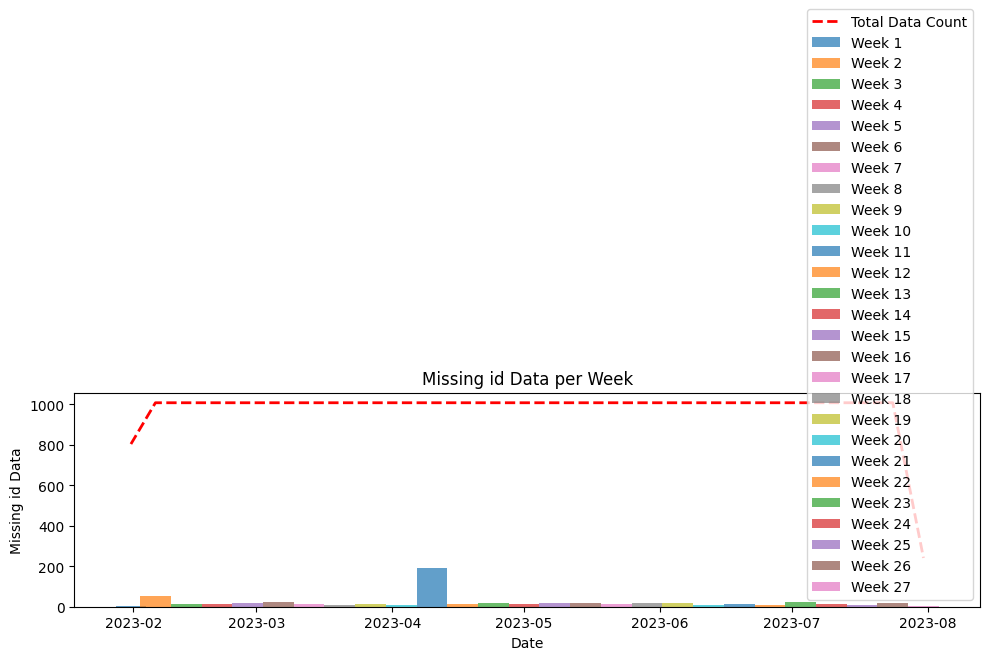

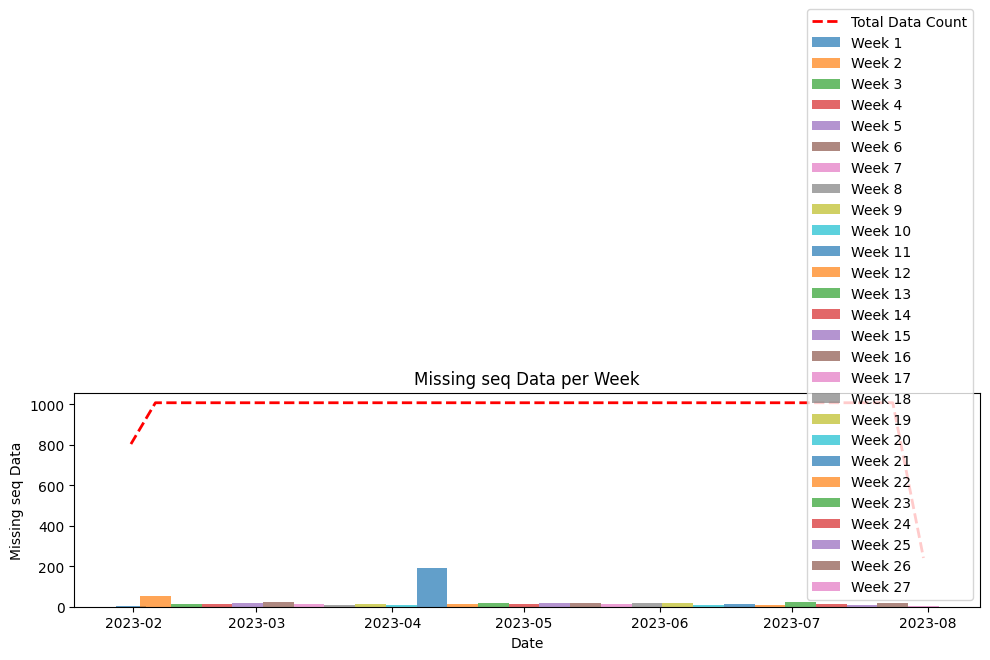

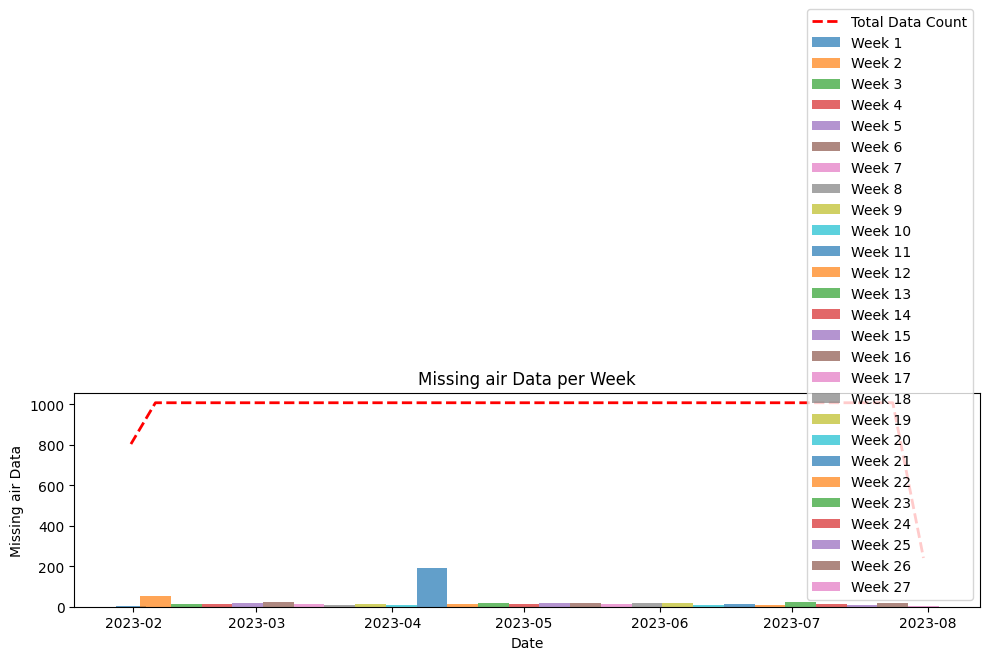

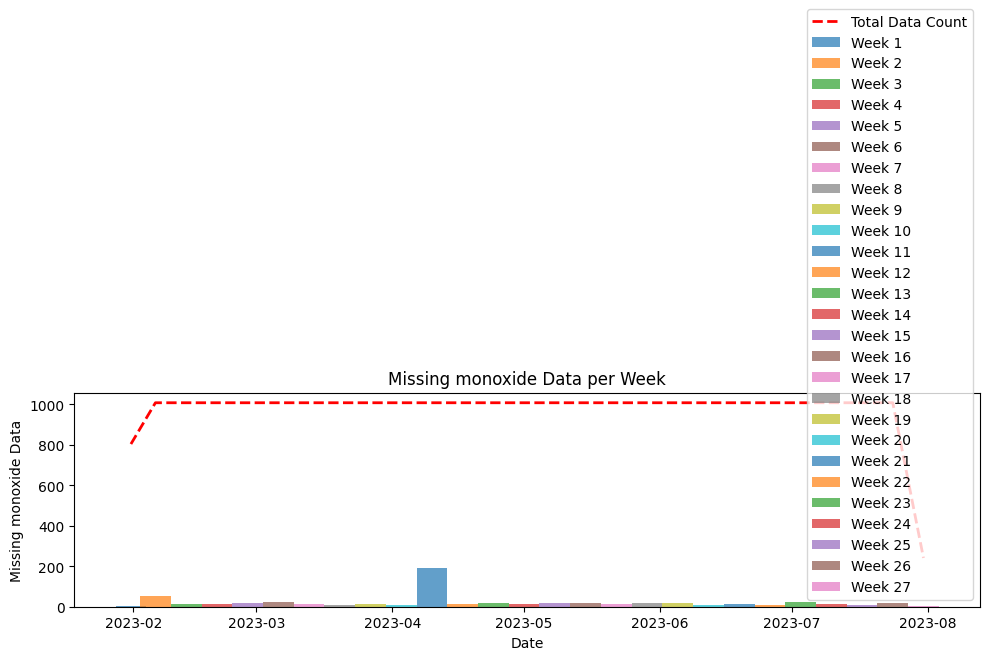

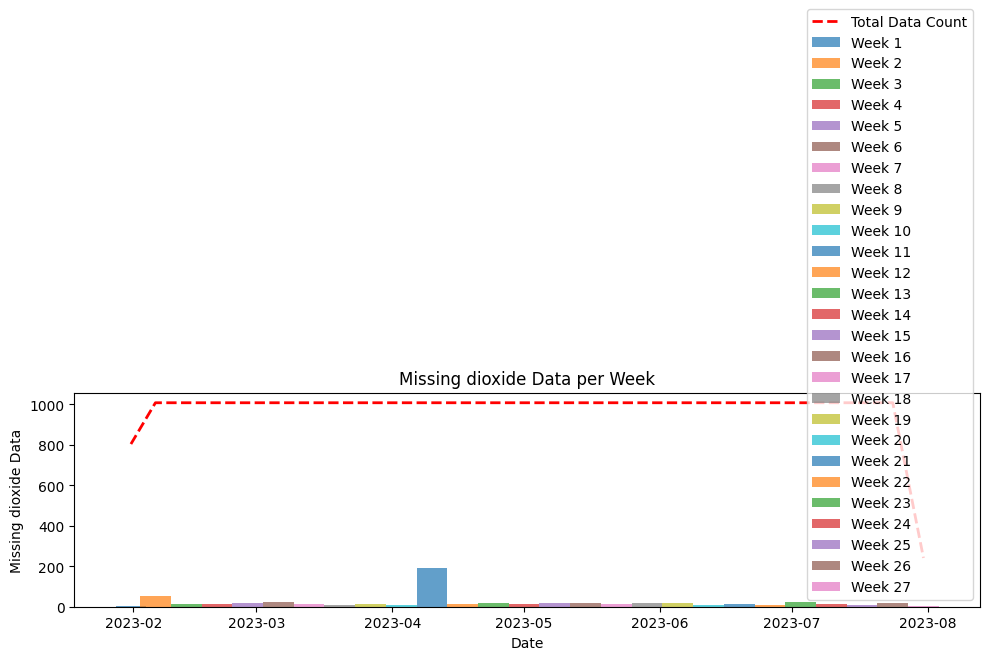

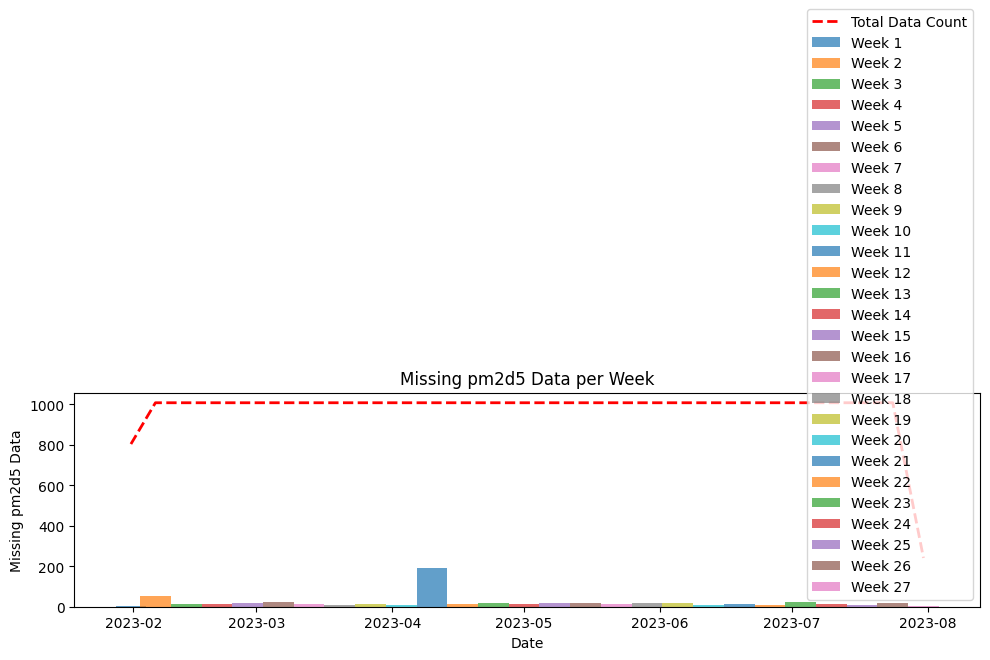

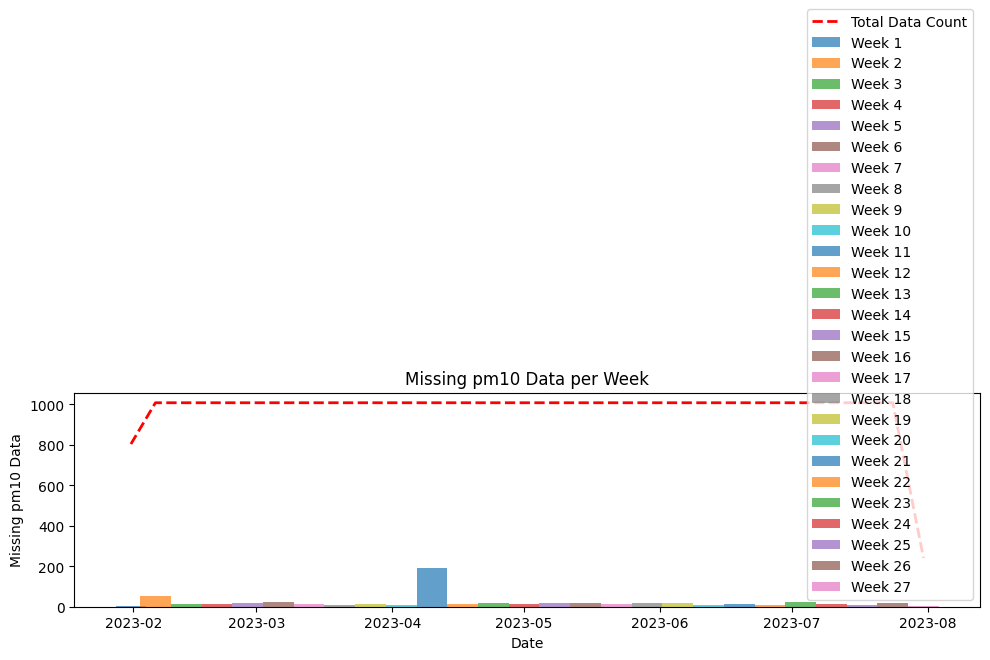

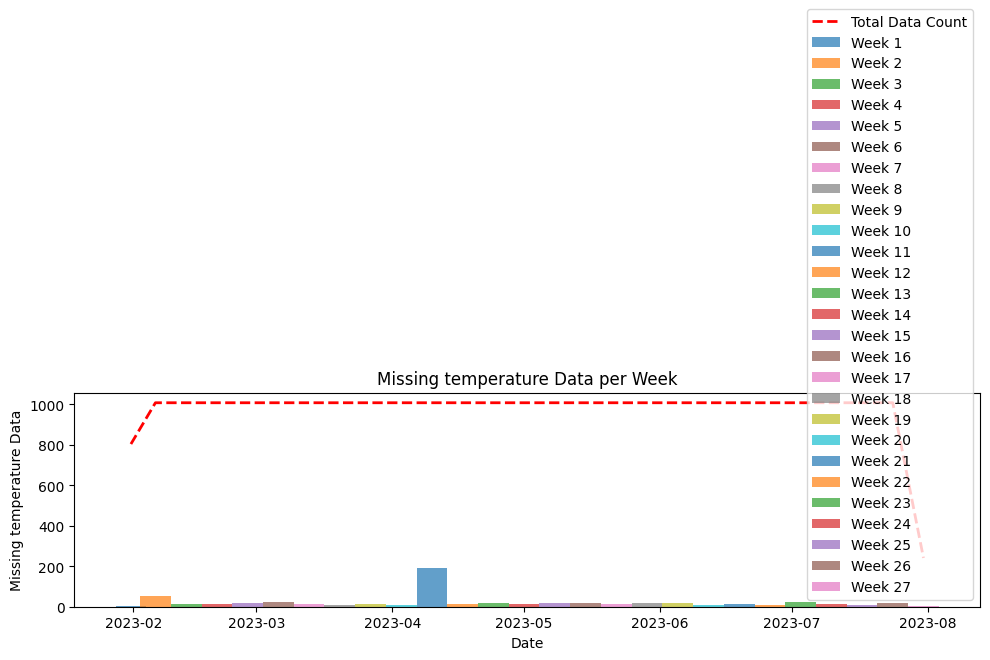

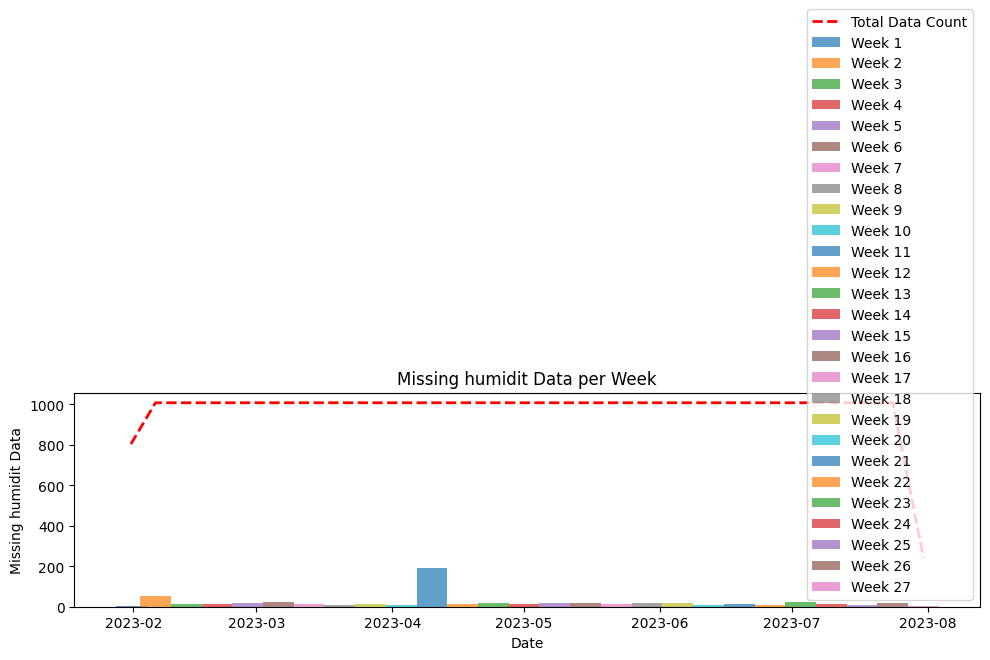

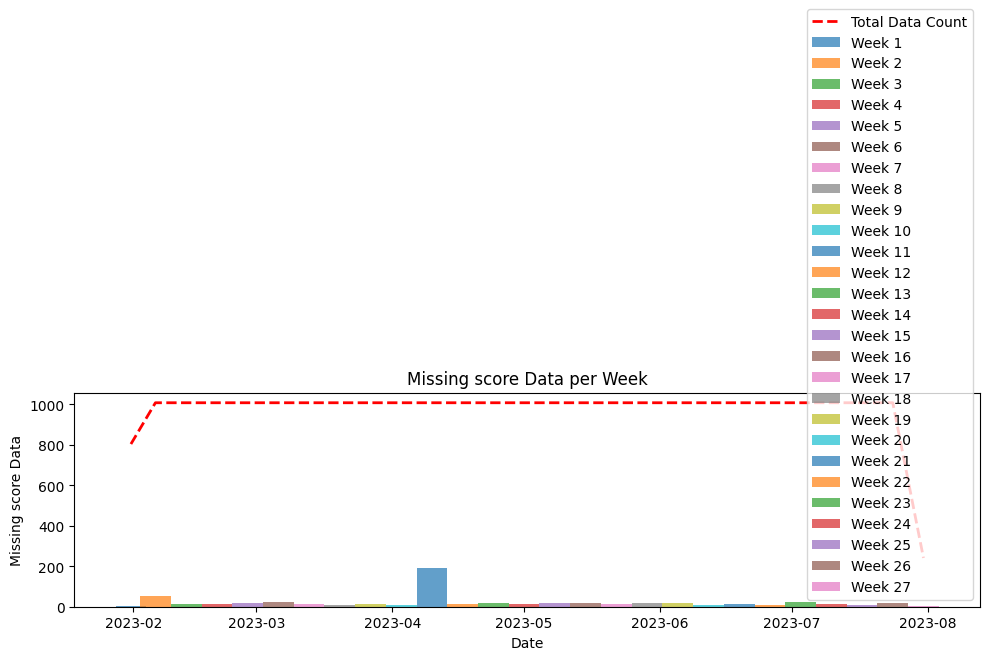

In [ ]:
import matplotlib.pyplot as plt

# 주차별로 데이터 분리
weeks = plant1_p.groupby(pd.Grouper(level=0, freq='W'))

features = plant1_p.columns

for feature in features:
    plt.figure(figsize=(10, 5))

    total_data_counts = []  # 각 주차별로 누적된 전체 데이터 개수를 저장하기 위한 리스트
    week_start_dates = []  # 각 주차의 시작 날짜를 저장하기 위한 리스트

    for week_number, week_data in enumerate(weeks):
        week_start_date = week_data[1].index.min()
        week_end_date = week_data[1].index.max()

        # 결측치 계산
        missing_data = week_data[1][feature].isnull().sum()

        # 주차별로 결측치를 막대 그래프로 시각화
        plt.bar(week_start_date, missing_data, width=7, label=f'Week {week_number + 1}', alpha=0.7)

        # 전체 데이터 개수 계산 및 저장
        total_data_count = len(week_data[1])
        total_data_counts.append(total_data_count)
        week_start_dates.append(week_start_date)

    # 빨간색 선 그래프로 전체 데이터 개수를 나타냅니다.
    plt.plot(week_start_dates, total_data_counts, color='red', label='Total Data Count', linewidth=2, linestyle='--')

    plt.xlabel('Date')
    plt.ylabel(f'Missing {feature} Data')
    plt.title(f'Missing {feature} Data per Week')
    plt.legend()
    plt.tight_layout()
    plt.show()